# Results

This notebook contains the code for generating the result plots for all cases. Results are calculated executing the `Comparison_...py` scripts. 

In [96]:
import pickle as pk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
import sys
sys.path.insert(1, '/home/aolivares/sslearn')

# Contents

1. [Training with full datasets](#1.-Training-with-full-datasets)

    a. [Single-substitutions datasets](#1.a.-Single-substitutions-datasets)
    
    b. [Double-substitutions and multiple-substitutions datasets](#1.b.-Double-substitutions-and-multiple-substitutions-datasets)
    
2. [Training with few instances](#2.-Training-with-few-instances)

    a. [Single-substitutions datasets](#2.a.-Single-substitutions-datasets)
    
    b. [Double-substitutions and multiple-substitutions datasets](#2.b.-Double-substitutions-and-multiple-substitutions-datasets)
    
3. [State-of-the-art comparison](#3.-State-of-the-art-comparison)

4. [Generalization](#4.-Generalization)

In [97]:
#GLOBAL VARIABLES USED IN DIFFERENT PLOTS 

datasets_1 = ['bg_strsq', 'blat_ecolx_1', 'blat_ecolx_2', 'blat_ecolx_3', 'blat_ecolx_4', 'brca1_human_1', 
              'brca1_human_2', 'gal4_yeast', 'hg_flu', 'hsp82_yeast', 'mth3_haeaestabilized', 'pabp_yeast_1',
              'polg_hcvjf', 'rl401_yeast_1', 'rl401_yeast_2', 'ube4b_mouse', 'yap1_human']

datasets_2 = ['pabp_yeast_2', 'avgfp']

global_models = { 
          'CoTraining': ('cot_rf', 'cot_ab', 'cot_dt', 'cot_svm', 'cot_gnb', 'cot_knn'), 
          #'DemocraticCoLearning': ('dcol_rf+gnb+svc', 'dcol_ab+gnb+svc', 'dcol_dt+gnb+svc'), 
          'TriTraining': ('trit_rf', 'trit_ab', 'trit_dt', 'trit_svm', 'trit_gnb', 'trit_knn'),
          'TriTrainingRegressor': ('tritr_rf', 'tritr_ab', 'tritr_dt', 'tritr_r', 'tritr_svm', 'tritr_knn'),
          'CoRegression': ('cor',)
         }

global_background_colors = ['lightblue', 'pink', 'palegreen', 'moccasin', 'plum', 'khaki']

dataset_colors = ['gray', 'red', 'darkorange', 'darkgoldenrod', 'yellow', 'olive', 'greenyellow', 
                  'lime', 'darkgreen', 'teal', 'dodgerblue', 'aqua', 'blue', 'indigo', 'darkviolet', 
                  'magenta', 'hotpink']

model_colors = {'CoTraining': 'darkviolet', 
                'TriTraining': 'royalblue', 
                'TriTrainingRegressor': 'coral', 
                'MERGE': 'green', 
                'CoRegression': 'turquoise', 
                'DemocraticCoLearning': 'grey'}


global_models_2 = {'rfc': (('CoTraining', 'cot_rf'), 
                          #('DemocraticCoLearning', 'dcol_rf+gnb+svc'), 
                          ('TriTraining', 'trit_rf')), 
                  'abc': (('CoTraining', 'cot_ab'),
                          #('DemocraticCoLearning', 'dcol_ab+gnb+svc'), 
                          ('TriTraining', 'trit_ab')), 
                  'dtc': (('CoTraining', 'cot_dt'), 
                          #('DemocraticCoLearning', 'dcol_dt+gnb+svc'), 
                          ('TriTraining', 'trit_dt')), 
                  'svc': (('CoTraining', 'cot_svm'),
                          #('DemocraticCoLearning', 'dcol_rf+gnb+svc'), 
                          #('DemocraticCoLearning', 'dcol_ab+gnb+svc'), 
                          #('DemocraticCoLearning', 'dcol_dt+gnb+svc'), 
                          ('TriTraining', 'trit_svm')), 
                  'gnb': (('CoTraining', 'cot_gnb'),
                          #('DemocraticCoLearning', 'dcol_rf+gnb+svc'),
                          #('DemocraticCoLearning', 'dcol_ab+gnb+svc'),
                          #('DemocraticCoLearning', 'dcol_dt+gnb+svc'),
                          ('TriTraining', 'trit_gnb')), 
                  'knnc': (('CoTraining', 'cot_knn'),
                           ('TriTraining', 'trit_knn')), 
                  'rfr': (('TriTrainingRegressor', 'tritr_rf'),
                         ),
                  'abr': (('TriTrainingRegressor', 'tritr_ab'),
                         ),
                  'dtr': (('TriTrainingRegressor', 'tritr_dt'),
                         ),
                  'r': (('TriTrainingRegressor', 'tritr_r'),
                       ), 
                  'svr': (('TriTrainingRegressor', 'tritr_svm'),
                         ),
                  'knnr': (('TriTrainingRegressor', 'tritr_knn'),
                           ('CoRegression', 'cor'), 
                          )
                  }

shorten_models = {'MERGE': 'MERGE', 
                  'merge': 'MERGE',
                  'CoTraining': 'CoT', 
                  'cot': 'CoT',
                  'DemocraticCoLearning': 'DCoL', 
                  'dcol': 'DCoL',
                  'TriTraining': 'TriT', 
                  'trit': 'TriT',
                  'TriTrainingRegressor': 'TriT R',
                  'tritr': 'TriT R',
                  'CoRegression': 'COREG',
                  'cor': 'COREG'}


expand_estimators = {'rfc': 'Random Forest C', 
                     'abc': 'Ada Boost C', 
                     'dtc': 'Decision Tree C', 
                     'svc': 'SVC', 
                     'gnb': 'Naive Bayes', 
                     'knnc': 'KNN C', 
                     'rfr': 'Random Forest R', 
                     'abr': 'Ada Boost R',
                     'dtr': 'Decision Tree R', 
                     'r': 'Ridge', 
                     'svr': 'SVR', 
                     'knnr': 'KNN R'}

expand_estimators_slim = {'rfc': 'Random\nForest\nC', 
                          'abc': 'Ada\nBoost\nC', 
                          'dtc': 'Decision\nTree\nC', 
                          'svc': 'SVC', 
                          'gnb': 'Naive\nBayes', 
                          'knnc': 'KNN\nC', 
                          'rfr': 'Random\nForest\nR', 
                          'abr': 'Ada\nBoost\nR',
                          'dtr': 'Decision\nTree\nR', 
                          'r': 'Ridge', 
                          'svr': 'SVR', 
                          'knnr': 'KNN\nR'}


metric_labels = {'spearman': r"$\rho$", 
                 'wspearman': r"$\rho_w$", 
                 'wtau': r"$\tau_w$"}


# 1. Training with full datasets 

## 1.a. Single-substitutions datasets

- Training with full single-substitutions datasets. 
- 10 fold cross validation. 

### Per base estimator plots

In [1075]:
def printSupervisedComparison(metric = 'spearman'): 

    datasets = datasets_1
    colors = dataset_colors
    models = global_models_2
    
    for key, items in models.items(): 
        data = []
        labels = []
        row = []
        for dataset in datasets: 
            scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'.pk', 'rb'))
            row.append(np.mean([s[metric+'_'+key] for s in scores]))
        data.append(row)
        labels.append('BASE')
        h_line = np.median(row)
             
        for general_model, model in items: 
            row = []
            for dataset in datasets: 
                scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'.pk' , 'rb'))
                row.append(np.mean([s[metric+'_'+model] for s in scores]))
            data.append(row)
            
            labels.append(shorten_models[model.split('_')[0]])

        #SMALL PLOTS
        fig = plt.figure(figsize=(4, 3)) 
        xs=[]
        for i, d in enumerate(data): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))
        
        
        bp = plt.boxplot(data)
        plt.xticks(range(1,len(labels)+1), labels, rotation = 90)
        plt.tight_layout()
        plt.grid()
        plt.title('Base estimator: '+expand_estimators[key])
        
        plt.ylabel(metric_labels[metric])
        
        plt.axhline(y=h_line, color='r', linestyle='--')
        
        alpha_points = 0.6
        for i, (x, d) in enumerate(zip(xs, data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                if i==0: 
                    plt.scatter(axis, point, alpha=alpha_points, color=c, label=dataset)
                else: 
                    plt.scatter(axis, point, alpha=alpha_points, color=c, label=None)
        plt.setp(bp['medians'], color='black', linestyle='--')
        lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=3)

    

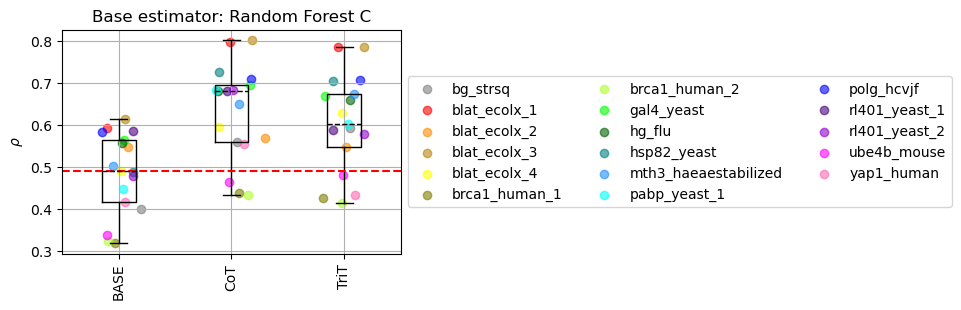

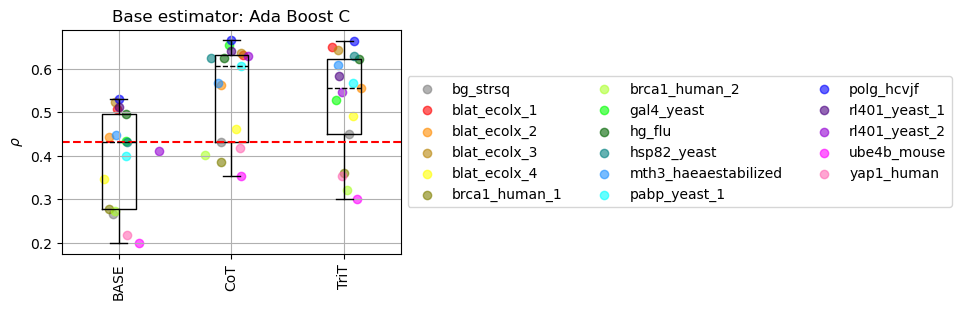

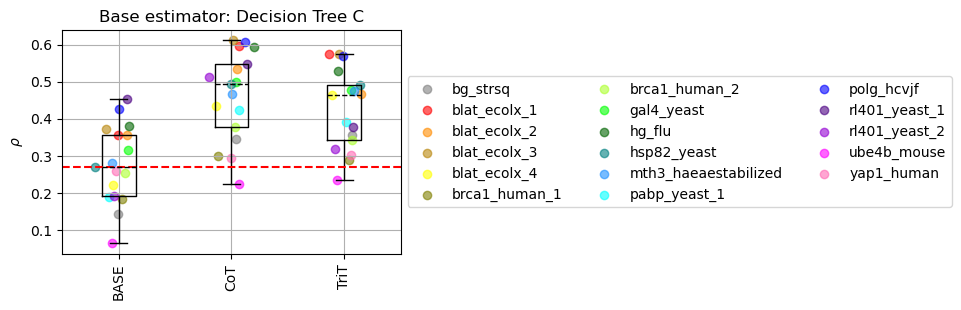

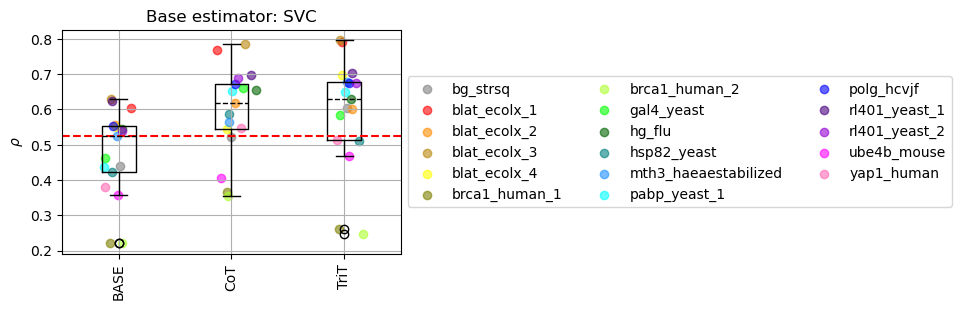

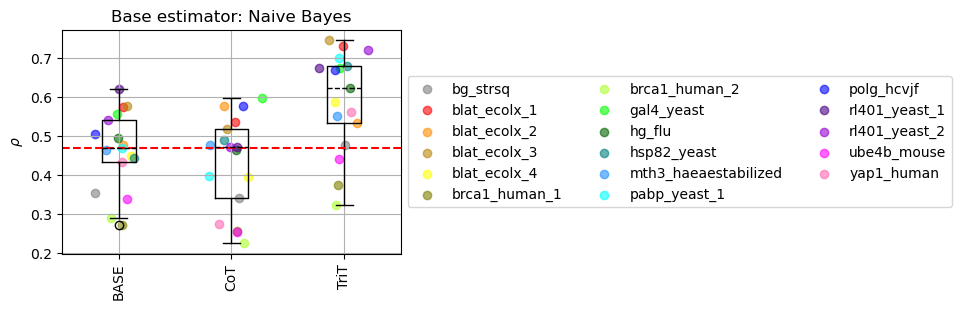

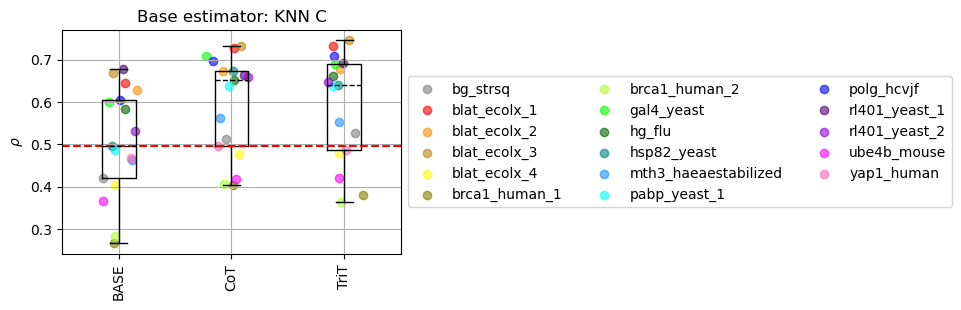

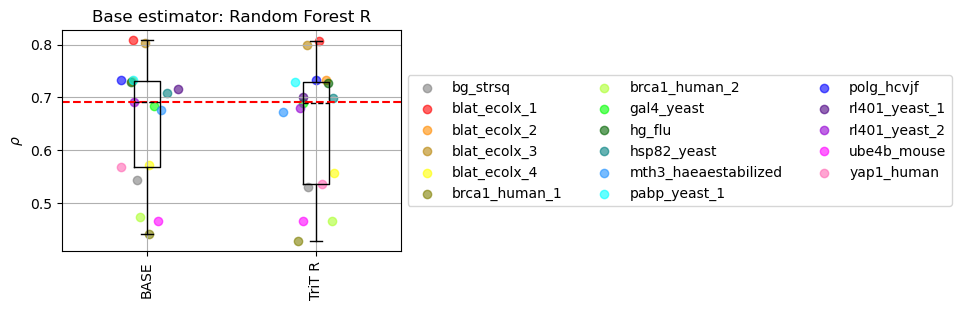

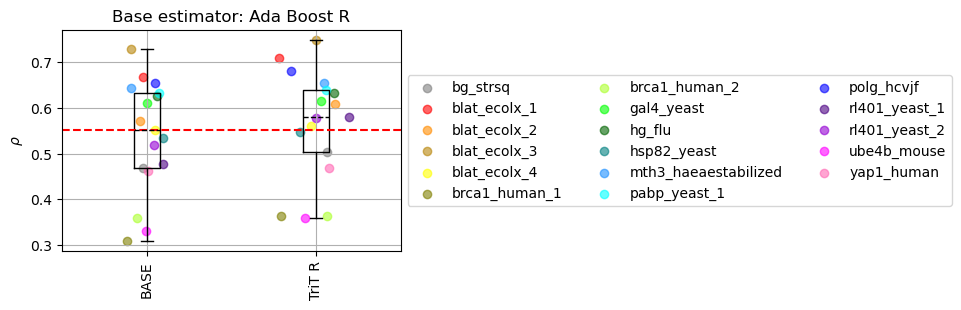

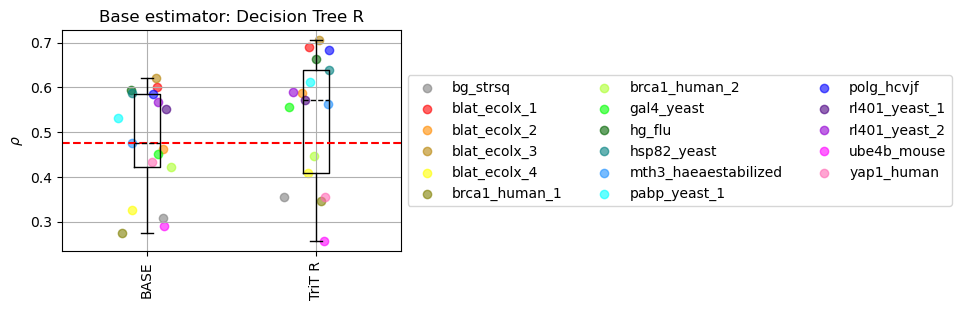

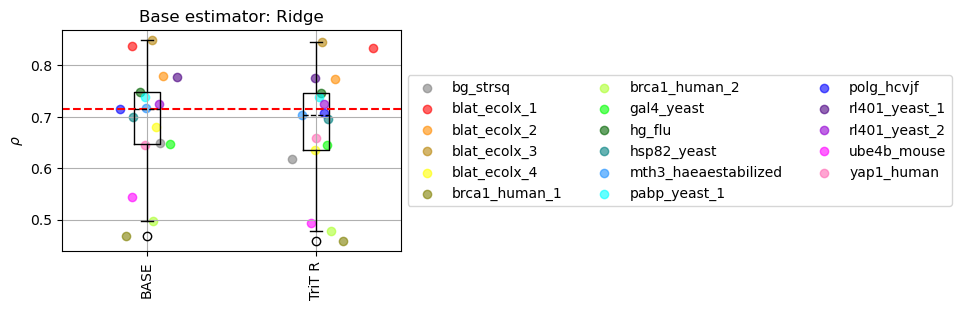

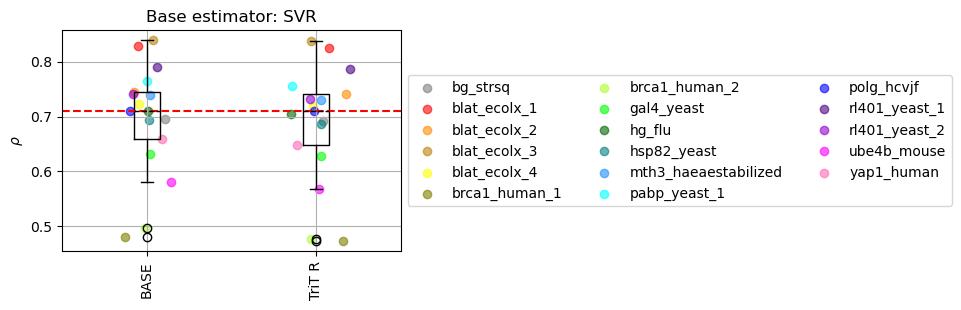

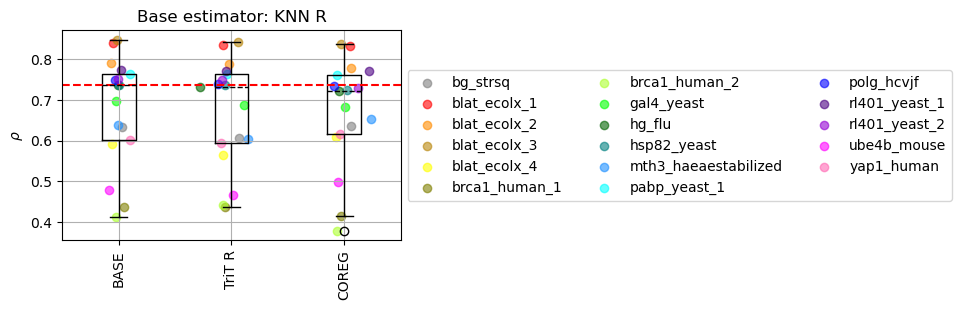

In [1076]:
printSupervisedComparison(metric='spearman')

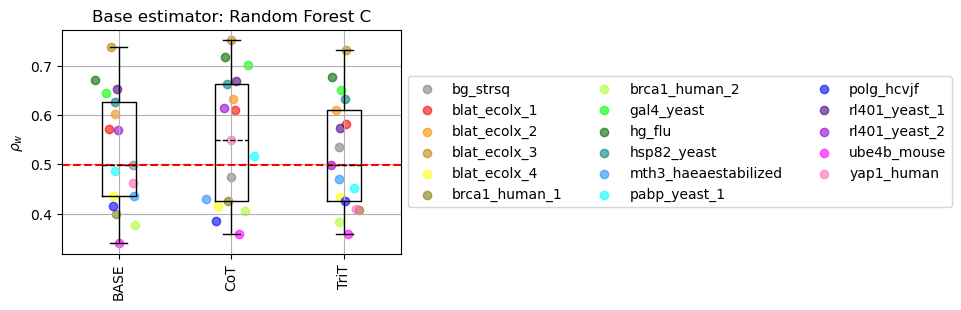

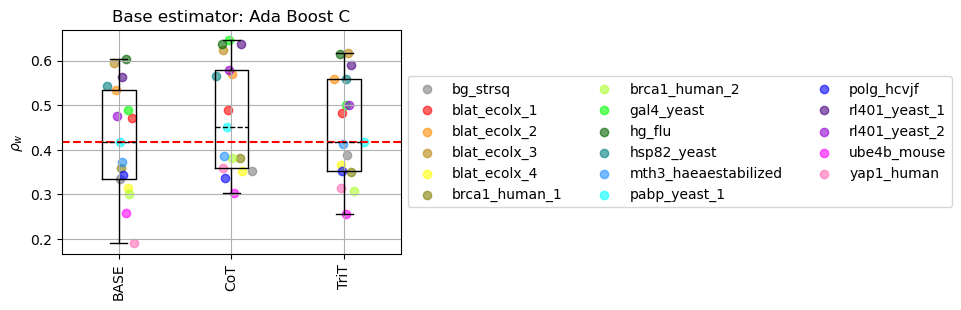

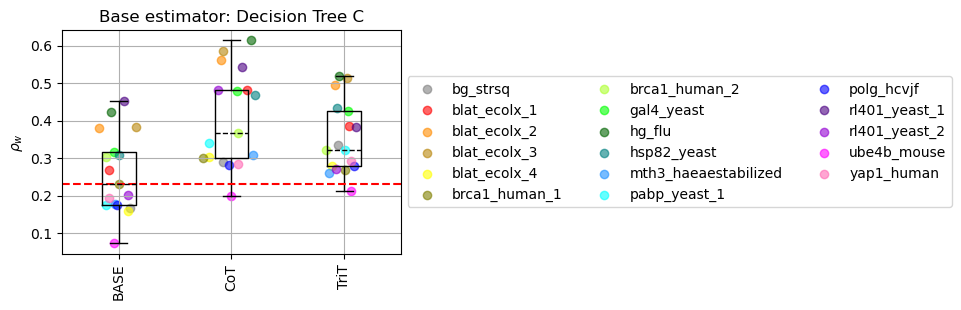

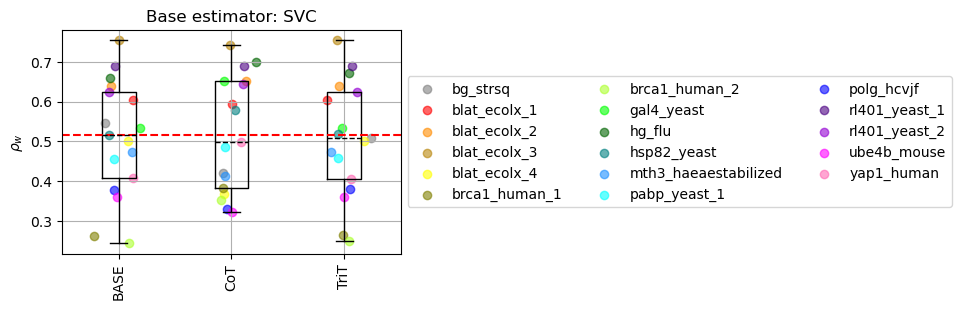

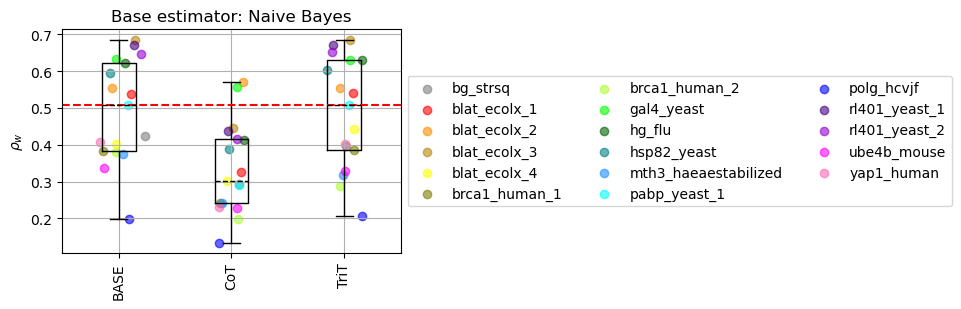

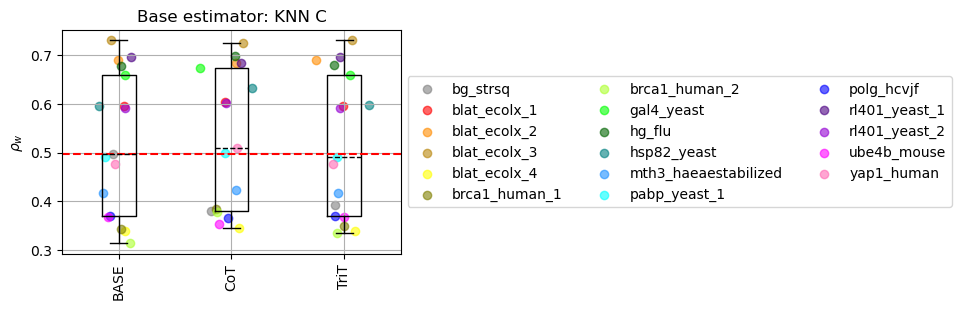

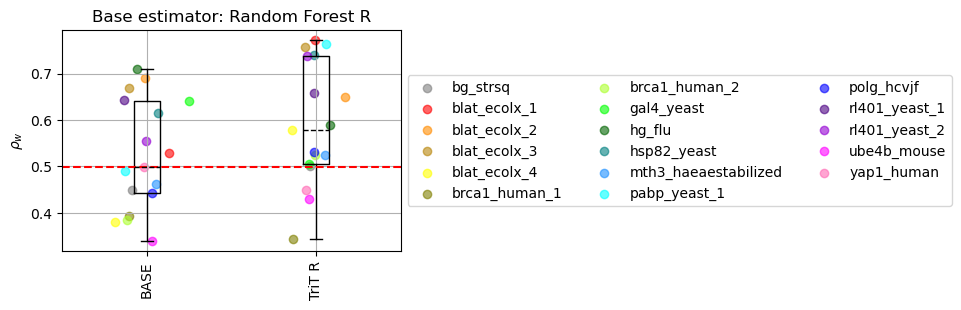

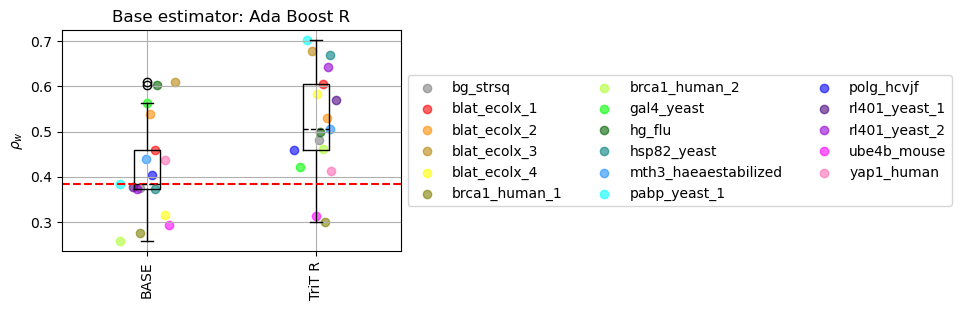

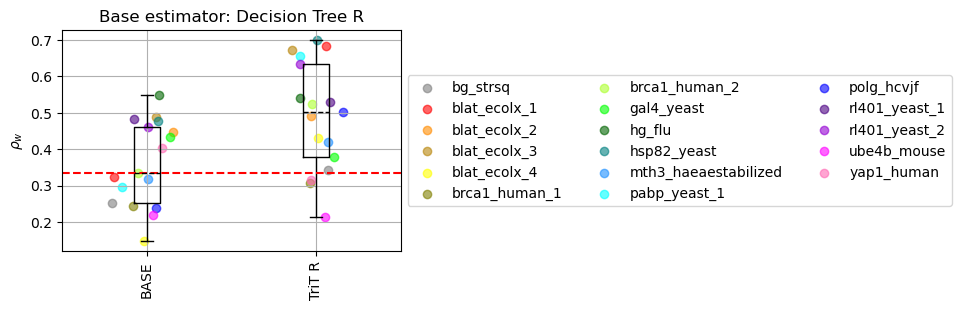

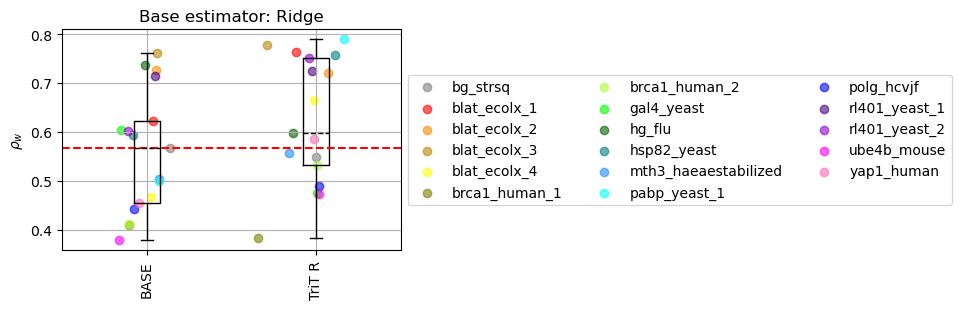

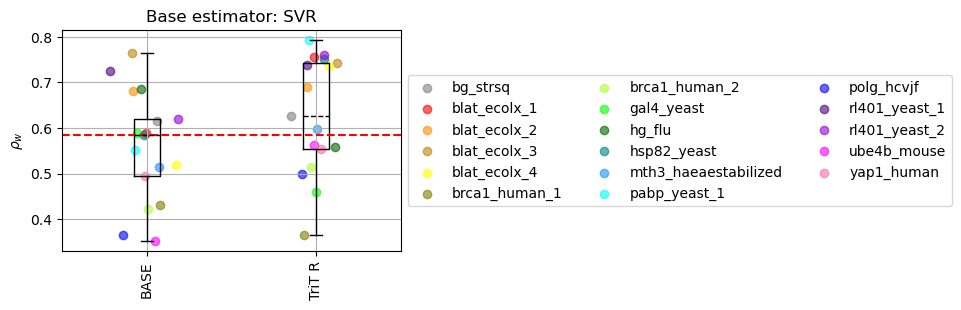

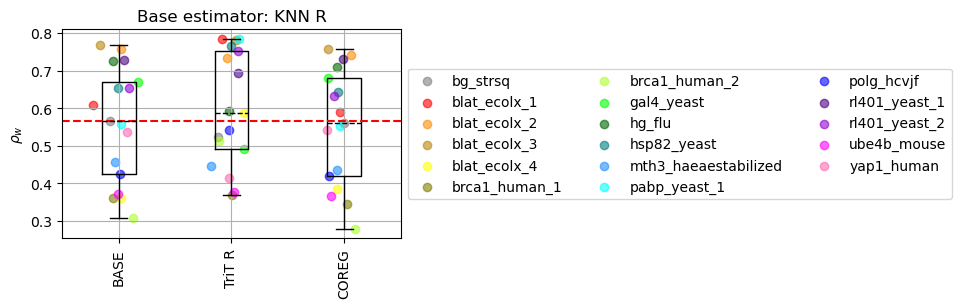

In [1077]:
printSupervisedComparison(metric='wspearman')

### Per base estimator summary plot

In [1078]:
import matplotlib.ticker as ticker

def printSupervisedComparison(metrics = ['spearman', 'wspearman'], n=None, estimators='C'): 
    
    datasets = datasets_1
    colors = dataset_colors
    models = global_models_2
    
    if estimators =='C': 
        models = {k:v for (k,v) in models.items() if k in ['rfc', 'abc', 'dtc', 'svc', 'gnb', 'knnc']}
        pos_line = -0.2
        pos_labels = -0.23
    elif estimators == 'R': 
        pos_line = -0.22
        pos_labels = -0.25
        models = {k:v for (k,v) in models.items() if k in ['rfr', 'abr', 'dtr', 'r', 'svr', 'knnr']}
    
    fig, ax1 = plt.subplots(2, figsize=(7, 5))
    #title = plt.suptitle('Single substitution datasets mean scores\n(Supervised vs. Semi-supervised)')
    
    for n_plot, metric in enumerate(metrics): 
        overall_data = []
        overall_labels = []
        overall_hlines = []
        big_labels = []
        for key, items in models.items(): 
            row = []
            for dataset in datasets: 
                if n==None: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'.pk', 'rb'))
                else: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                row.append(np.mean([s[metric+'_'+key] for s in scores]))
            overall_labels.append('BASE')
            overall_data.append(row)
            h_line = np.median(row)
            overall_hlines.append(h_line)
            big_labels.append(expand_estimators_slim[key])

            for general_model, model in items: 
                row = []
                for dataset in datasets:
                    if n==None: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'.pk' , 'rb'))
                    else: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+model] for s in scores]))
                overall_data.append(row)
                overall_labels.append(shorten_models[general_model])

        #BIG PLOT 

        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))

        bp = ax1[n_plot].boxplot(overall_data)
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 90)
        id_tick_change_color = [i for i, l in enumerate(overall_labels) if l=='BASE' ]
        for i in id_tick_change_color: 
            plt.setp(ax1[n_plot].get_xticklabels()[i], color='red')

        i = 0.5
        overall_vlines = [0.5]
        for key, h_line in zip(models, overall_hlines): 
            length = len(models[key])+1
            overall_vlines.append(length+i)
            ax1[n_plot].axvline(i+length, color='black', linestyle='-', linewidth=1)
            ax1[n_plot].plot([i, i+length], [h_line, h_line], color='r', linestyle='--')
            i+=length

        big_labels_pos = []
        for i in range(len(overall_vlines)-1): 
            big_labels_pos.append((overall_vlines[i]+overall_vlines[i+1])/2)

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0.1, 0.9)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        alpha_points = 0.4
        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                if i==0: 
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            extra_artists = []
            if estimators=='R': 
                lgd = plt.legend(loc='center left', bbox_to_anchor=(-0.035, -1), 
                                 ncol=5, fontsize=9, labelspacing=0.3, columnspacing=0)
                extra_artists.append(lgd)
            
            ax1[n_plot].xaxis.set_minor_locator(ticker.FixedLocator(overall_vlines))
            ax1[n_plot].tick_params('x', length=48, width=1, direction='out', which='minor', color='lightgray')
            ax1[n_plot].annotate('', xy=(len(overall_labels)+0.6, pos_line), xycoords='data', 
                                 xytext=(0.4, pos_line), annotation_clip=False, 
                                 arrowprops=dict(arrowstyle='-', color='lightgray'))
            
            for bl, bl_pos in zip(big_labels, big_labels_pos): 
                text = ax1[n_plot].text(bl_pos, pos_labels, bl, verticalalignment='top', horizontalalignment='center')
                extra_artists.append(text)

    fig.savefig(f'figs/singles_overall_super_vs_semi_subplot_{estimators}.png', bbox_extra_artists=extra_artists, bbox_inches='tight')


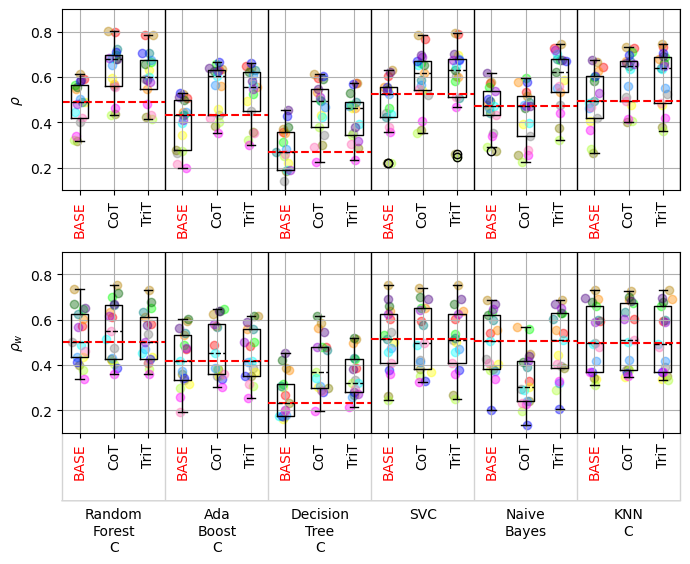

In [1079]:
printSupervisedComparison(metrics = ['spearman', 'wspearman'], estimators='C')

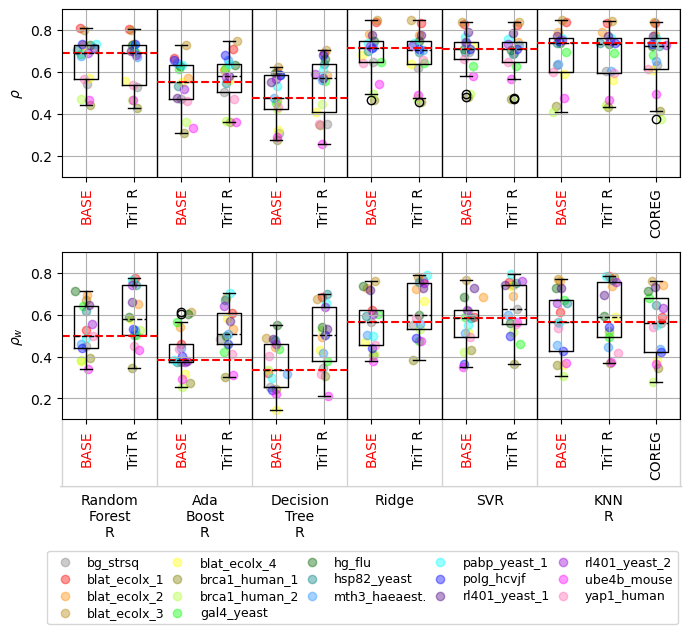

In [1080]:
printSupervisedComparison(metrics = ['spearman', 'wspearman'], estimators='R')

In [1081]:
import cv2
img_C = cv2.imread('figs/singles_overall_super_vs_semi_subplot_C.png')
img_R = cv2.imread('figs/singles_overall_super_vs_semi_subplot_R.png')
print(img_C.shape)
print(img_R.shape)
width = img_C.shape[1]
img = cv2.vconcat([img_C, img_R[:,:width,:]])
cv2.imwrite('figs/singles_overall_super_vs_semi_subplot.png', img)

(564, 689, 3)
(634, 689, 3)


True

### 2D plots

In [1082]:
import statistics

def printSupervisedComparison2D(estimators = 'C', metrics = ['spearman', 'wspearman'], n=None): 

    datasets = datasets_1
    colors = model_colors
    models = global_models_2
    titles = expand_estimators
    
    if estimators =='C': 
        models = {k:v for (k,v) in models.items() if k in ['rfc', 'abc', 'dtc', 'svc', 'gnb', 'knnc']}
    elif estimators == 'R': 
        models = {k:v for (k,v) in models.items() if k in ['rfr', 'abr', 'dtr', 'r', 'svr', 'knnr']}
    
    fig = plt.figure(figsize=(6, 7))
    plt.suptitle('Single substitution datasets mean scores\n(Supervised vs. Semi-supervised)')
    for case, (key, items) in enumerate(models.items()): 
        
        points = []
        colors_list = []
        base = [None, None]
        annotations = []
        for i, metric in enumerate(metrics): 
            data = []
            labels = []
            dataset_means = []
            for dataset in datasets: 
                if n==None: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'.pk', 'rb'))
                else: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                dataset_means.append(np.mean([s[metric+'_'+key] for s in scores]))
            base[i] = statistics.median(dataset_means)
            labels.append(key)

            for general_model, model in items: 
                dataset_means = []
                for dataset in datasets: 
                    if n==None: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'.pk' , 'rb'))
                    else: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                    dataset_means.append(np.mean([s[metric+'_'+model] for s in scores]))
                data.append(statistics.median(dataset_means))
                labels.append(model)
                
                if i==0: 
                    annotations.append(shorten_models[general_model])
                    colors_list.append(colors[general_model])
                
            points.append(data)

        #SMALL PLOTS
        plt.subplot(3, 2, case+1) 
        
        plt.scatter(base[0], base[1], color='red', marker='P')
        plt.annotate('BASE', (base[0]-0.22, base[1]-0.12), color='red')
        plt.plot([base[0], base[0]], [base[1], 0], color='r', linestyle='--')
        plt.plot([0, base[0]], [base[1], base[1]], color='r', linestyle='--')
        
        for i, color in enumerate(colors_list): 
            plt.scatter(points[0][i], points[1][i], color=color, alpha=0.7, label=annotations[i])
            
        plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.3, linewidth='1')
        
        plt.xlim(0,1)
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.grid()
        plt.title('BASE: '+titles[key])
        
        plt.xlabel(metric_labels[metrics[0]])
        plt.ylabel(metric_labels[metrics[1]])
                
        plt.legend()
    
    if n==None:
        fig.savefig(f'figs/singles_2D_super_vs_semi_{estimators}.png', bbox_inches='tight')
    else: 
        fig.savefig(f'figs/singles_2D_super_vs_semi_{estimators}_n_{n}.png', bbox_inches='tight')
    

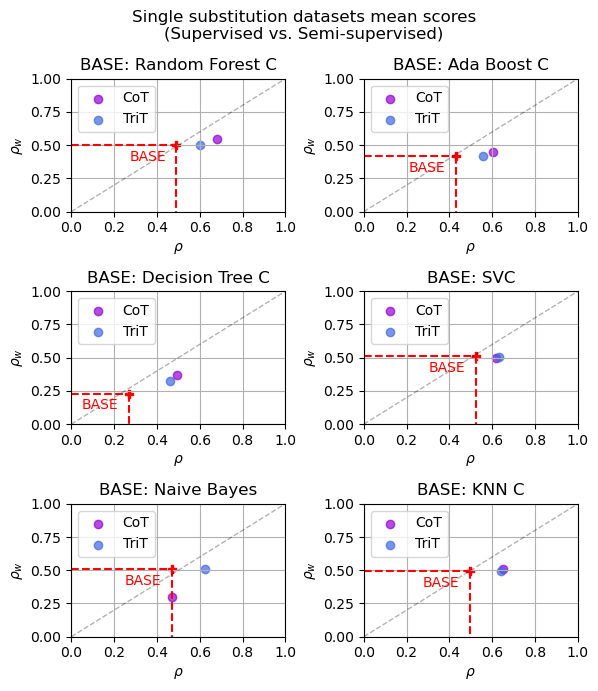

In [1083]:
printSupervisedComparison2D(estimators='C', metrics=['spearman', 'wspearman'])

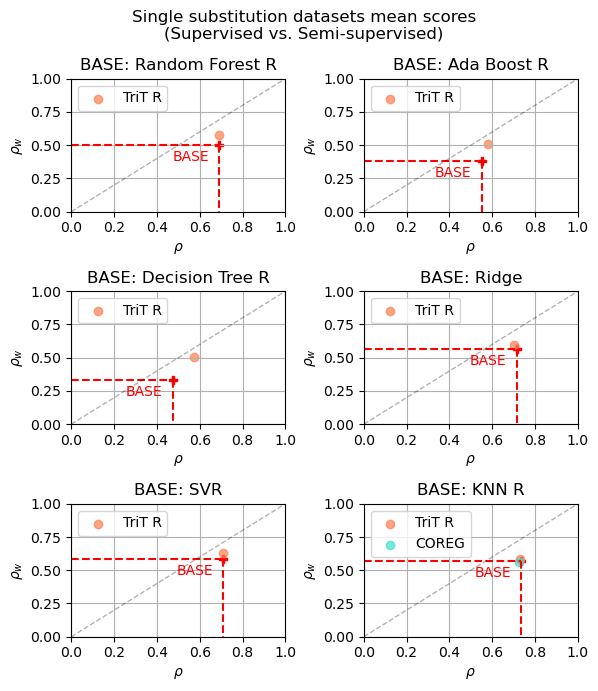

In [1084]:
printSupervisedComparison2D(estimators='R', metrics = ['spearman', 'wspearman'])

## 1.b. Double-substitutions and multiple-substitutions datasets
- Training with full double-substitutions (pabp_yeast_2) and multiple-substitutions (avgfp) datasets. 
- 10 fold cross validation. 

### Per base estimator summary plot

In [1085]:
import matplotlib.ticker as ticker

def set_box_color(bp, color): 

    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['fliers'], color=color)
    plt.setp(bp['means'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['caps'], color=color)
    
    for patch in bp['boxes']: 
        patch.set_facecolor('white')

def printSupervisedComparison(metrics = ['spearman', 'wspearman'], estimators='C'): 
    
    models = global_models_2
    
    if estimators =='C': 
        models = {k:v for (k,v) in models.items() if k in ['rfc', 'abc', 'dtc', 'svc', 'gnb', 'knnc']}
        pos_line = -0.195
        pos_labels = -0.22
    elif estimators == 'R': 
        pos_line = -0.22
        pos_labels = -0.3
        models = {k:v for (k,v) in models.items() if k in ['rfr', 'abr', 'dtr', 'r', 'svr', 'knnr']}
    
    fig, ax1 = plt.subplots(2, figsize=(7, 5))
    #title = plt.suptitle(f'Multiple substitution datasets scores\n(Supervised vs. Semi-supervised)')
    
    for n_plot, metric in enumerate(metrics): 
        overall_data_1 = []
        overall_data_2 = []
        overall_labels = []
        overall_hlines_1 = []
        overall_hlines_2 = []
        big_labels = []
        for key, items in models.items(): 
            scores_1 = pk.load(open('results/scores_supervised_comparison_avgfp.pk', 'rb'))
            scores_2 = pk.load(open('results/scores_supervised_comparison_pabp_yeast_2.pk', 'rb'))
            row_1 = [s[metric+'_'+key] for s in scores_1]
            row_2 = [s[metric+'_'+key] for s in scores_2]
            overall_data_1.append(row_1)
            overall_data_2.append(row_2)
            overall_hlines_1.append(np.median(row_1))
            overall_hlines_2.append(np.median(row_2))
            overall_labels.append('BASE')
            big_labels.append(expand_estimators_slim[key])
            
            for general_model, model in items: 
                scores_1 = pk.load(open('results/scores_comparison_'+general_model+'_avgfp.pk', 'rb'))
                scores_2 = pk.load(open('results/scores_comparison_'+general_model+'_pabp_yeast_2.pk', 'rb'))
                overall_data_1.append([s[metric+'_'+model] for s in scores_1])
                overall_data_2.append([s[metric+'_'+model] for s in scores_2])
                
                overall_labels.append(shorten_models[general_model])

        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data_1): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))

        bp_1 = ax1[n_plot].boxplot(overall_data_1, sym='.', patch_artist=True)
        bp_2 = ax1[n_plot].boxplot(overall_data_2, sym='.', patch_artist=True)
        
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 90)
        id_tick_change_color = [i for i, l in enumerate(overall_labels) if l=='BASE' ]
        for i in id_tick_change_color: 
            plt.setp(ax1[n_plot].get_xticklabels()[i], color='red')

        i = 0.5
        overall_vlines = [0.5]
        for key, h_line_1, h_line_2 in zip(models, overall_hlines_1, overall_hlines_2): 
            length = len(models[key])+1
            overall_vlines.append(length+i)
            ax1[n_plot].axvline(i+length, color='black', linestyle='-', linewidth=1)
            ax1[n_plot].plot([i, i+length], [h_line_1, h_line_1], color='r', linestyle='--')
            ax1[n_plot].plot([i, i+length], [h_line_2, h_line_2], color='r', linestyle='--')
            i+=length

        big_labels_pos = []
        for i in range(len(overall_vlines)-1): 
            big_labels_pos.append((overall_vlines[i]+overall_vlines[i+1])/2)

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(0.1, 0.9)

        ax1[n_plot].set_ylabel(metric_labels[metric])
        
        set_box_color(bp_1, 'blue')
        set_box_color(bp_2, 'green')
        
        ax1[n_plot].plot([], [], marker='s', color='blue', linestyle='', label='multiple')
        ax1[n_plot].plot([], [], marker='s', color='green', linestyle='', label='double')
        ax1[n_plot].legend(loc='lower right')

        plt.tick_params('both', length=0, width=0, which='minor')
    
        if n_plot == len(metrics)-1: 
            
            ax1[n_plot].xaxis.set_minor_locator(ticker.FixedLocator(overall_vlines))
            ax1[n_plot].tick_params('x', length=48, width=1, direction='out', which='minor', color='lightgray')
            ax1[n_plot].annotate('', xy=(len(overall_labels)+0.6, pos_line), xycoords='data', 
                                 xytext=(0.4, pos_line), annotation_clip=False, 
                                 arrowprops=dict(arrowstyle='-', color='lightgray'))
            
            for bl, bl_pos in zip(big_labels, big_labels_pos): 
                ax1[n_plot].text(bl_pos, pos_labels, bl, verticalalignment='top', horizontalalignment='center')
              
    fig.savefig(f'figs/multiples_super_vs_semi_subplot_{estimators}.png', bbox_inches='tight')

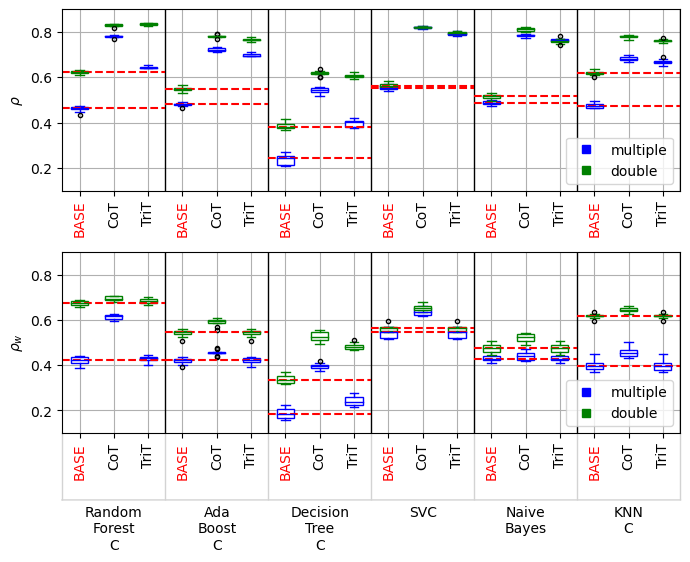

In [1086]:
printSupervisedComparison(estimators='C')

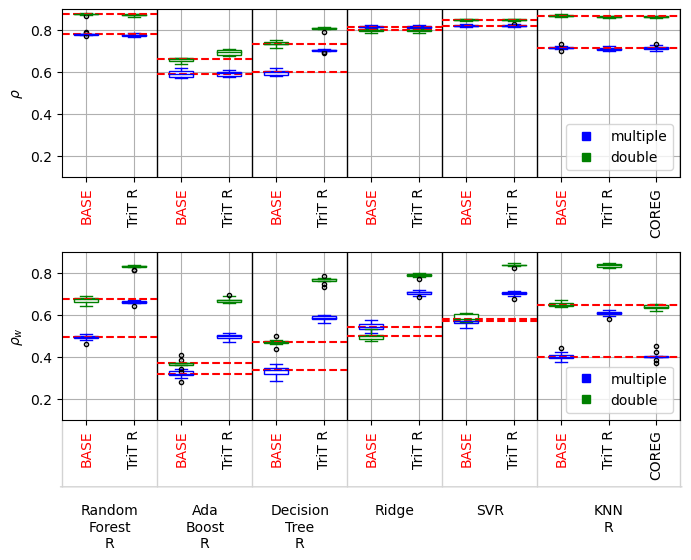

In [1087]:
printSupervisedComparison(estimators='R')

In [1088]:
import cv2
img_C = cv2.imread('figs/multiples_super_vs_semi_subplot_C.png')
img_R = cv2.imread('figs/multiples_super_vs_semi_subplot_R.png')
print(img_C.shape)
print(img_R.shape)
width = img_C.shape[1]
img = cv2.vconcat([img_C, img_R[:,:width,:]])
cv2.imwrite('figs/multiples_super_vs_semi_subplot.png', img)

(562, 690, 3)
(560, 691, 3)


True

# 2. Training with few instances

## 2.a. Single-substitutions datasets 
- Training with random subsamples of single-substitutions datasets. 
- Subsample size = 250, 200, 150, 100, 50
- 10 random repetitions of training and testing with the rest. 

### 2D plot n instances

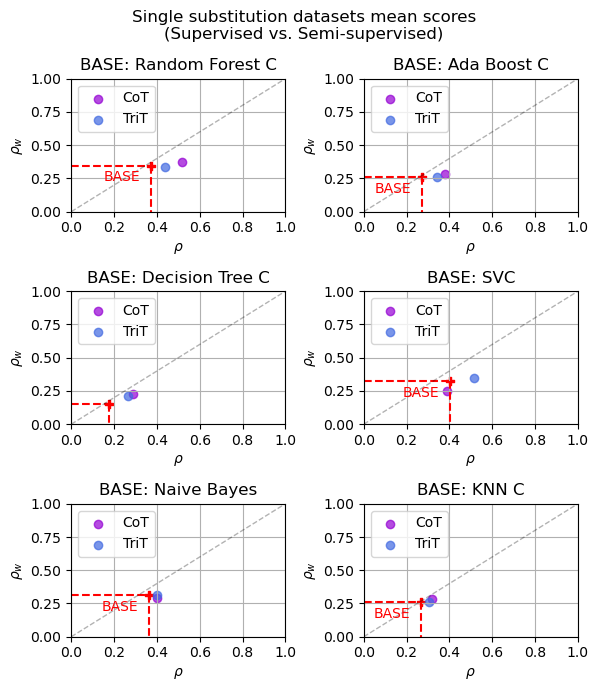

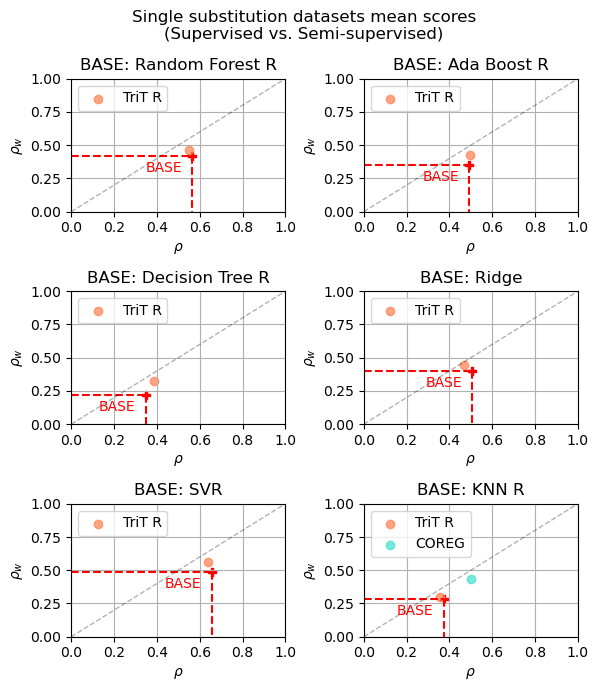

In [1089]:
printSupervisedComparison2D(estimators='C', metrics =['spearman', 'wspearman'], n=250)
printSupervisedComparison2D(estimators='R', metrics =['spearman', 'wspearman'], n=250)

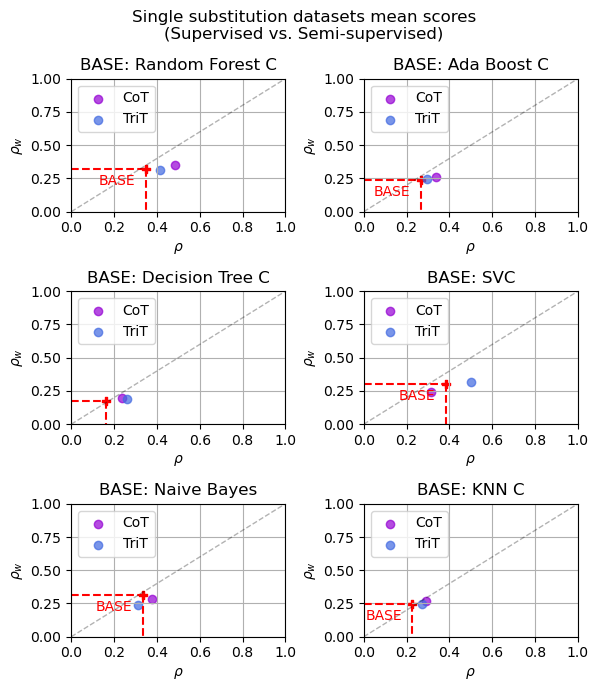

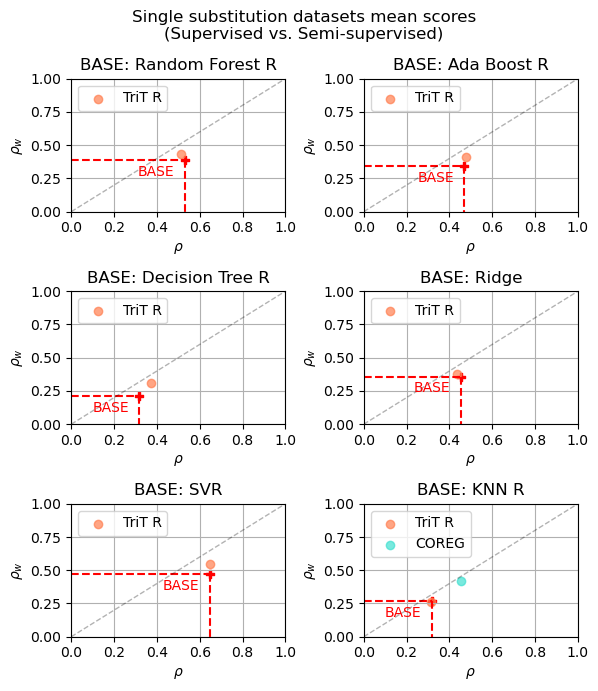

In [1090]:
printSupervisedComparison2D(estimators='C', metrics =['spearman', 'wspearman'], n=200)
printSupervisedComparison2D(estimators='R', metrics =['spearman', 'wspearman'], n=200)

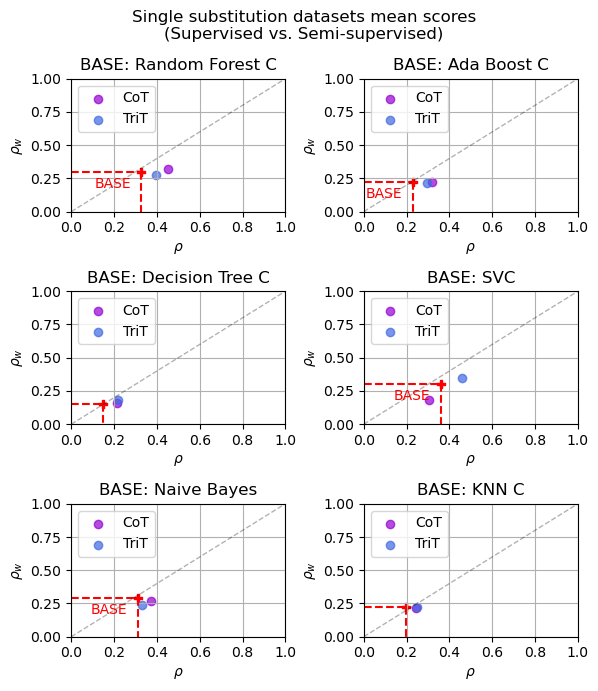

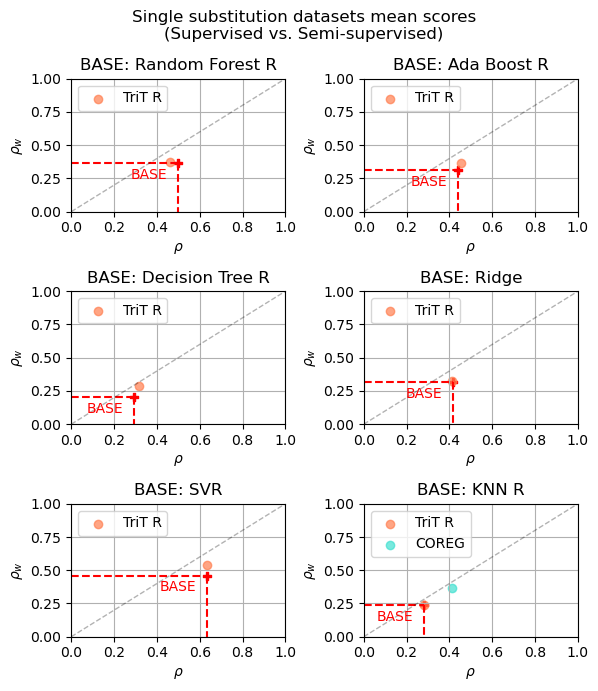

In [1091]:
printSupervisedComparison2D(estimators='C', metrics =['spearman', 'wspearman'], n=150)
printSupervisedComparison2D(estimators='R', metrics =['spearman', 'wspearman'], n=150)

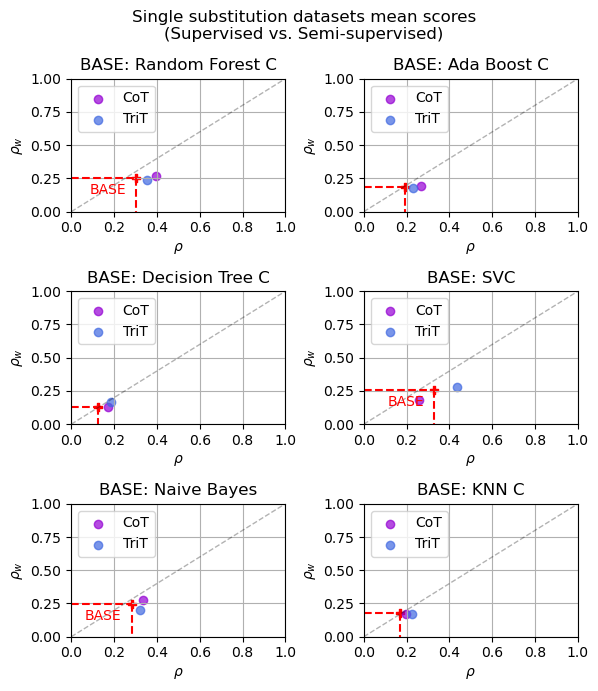

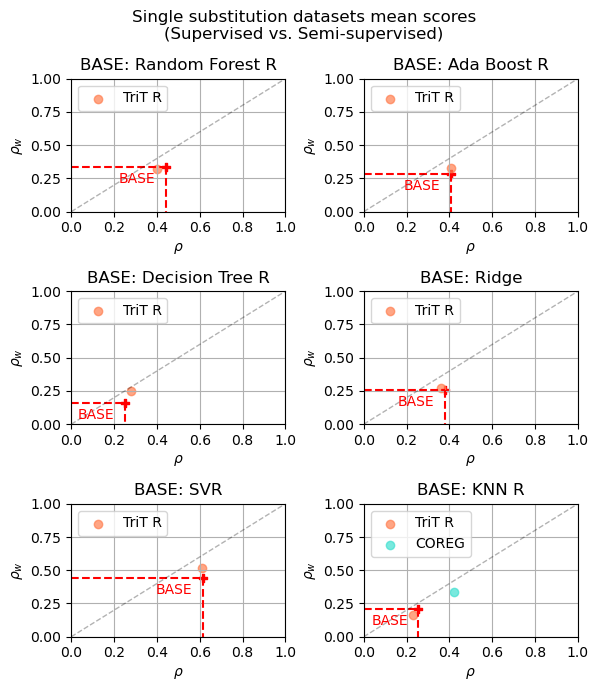

In [1092]:
printSupervisedComparison2D(estimators='C', metrics =['spearman', 'wspearman'], n=100)
printSupervisedComparison2D(estimators='R', metrics =['spearman', 'wspearman'], n=100)

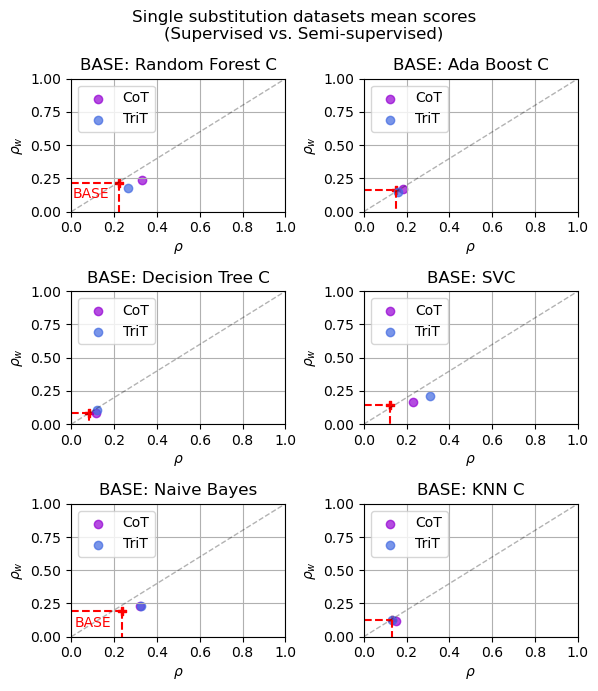

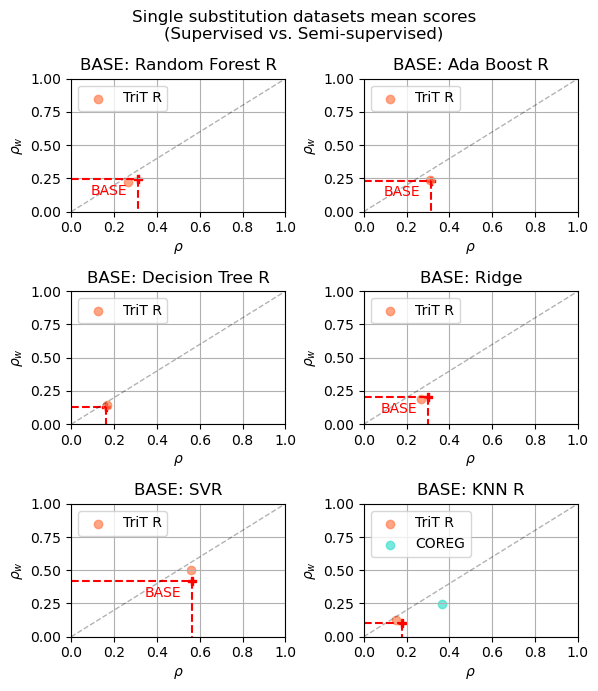

In [1093]:
printSupervisedComparison2D(estimators='C', metrics =['spearman', 'wspearman'], n=50)
printSupervisedComparison2D(estimators='R', metrics =['spearman', 'wspearman'], n=50)

In [1094]:
import statistics

def printSupervisedComparison2DModel(estimator = 'r', metrics = ['spearman', 'wspearman']): 
    
    n_instances = ['250', '200', '150', '100', '50']

    datasets = datasets_1
    colors = model_colors
    models = global_models_2
    titles = expand_estimators
    
    items = models[estimator]
    
    fig = plt.figure(figsize=(7, 5))
    plt.suptitle(f'Single substitution datasets mean scores\nBASE ESTIMATOR: {titles[estimator]}')
    
    for case, n in enumerate(n_instances): 
        
        points = []
        colors_list = []
        base = [None, None]
        annotations = []
        for i, metric in enumerate(metrics): 
            data = []
            labels = []
            dataset_means = []
            for dataset in datasets: 
                if n==None: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'.pk', 'rb'))
                else: 
                    scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                dataset_means.append(np.mean([s[metric+'_'+estimator] for s in scores]))
            base[i] = statistics.median(dataset_means)
            labels.append(estimator)

            for general_model, model in items: 
                dataset_means = []
                for dataset in datasets: 
                    if n==None: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'.pk' , 'rb'))
                    else: 
                        scores = pk.load(open('results/scores_comparison_'+general_model+'_'+dataset+'_'+str(n)+'_instances.pk', 'rb'))
                    dataset_means.append(np.mean([s[metric+'_'+model] for s in scores]))
                data.append(statistics.median(dataset_means))
                labels.append(model)
                
                if i==0: 
                    annotations.append(shorten_models[general_model])
                    colors_list.append(colors[general_model])
                
            points.append(data)

        #SMALL PLOTS
        plt.subplot(2, 3, case+1) 
        
        plt.scatter(base[0], base[1], color='red', marker='P')
        plt.annotate('BASE', (base[0]-0.27, base[1]-0.12), color='red')
        plt.plot([base[0], base[0]], [base[1], 0], color='r', linestyle='--')
        plt.plot([0, base[0]], [base[1], base[1]], color='r', linestyle='--')
        
        for i, color in enumerate(colors_list): 
            plt.scatter(points[0][i], points[1][i], color=color, alpha=0.7, label=annotations[i])
            
        plt.plot([0, 1], [0, 1], color='black', linestyle='--', alpha=0.3, linewidth='1')
        
        plt.xlim(0,1)
        plt.ylim(0, 1)
        plt.xticks([0, 0.25, 0.5, 0.75, 1.0])
        plt.tight_layout()
        plt.grid()
        plt.title(f'L= {n}')
        
        plt.xlabel(metric_labels[metrics[0]])
        plt.ylabel(metric_labels[metrics[1]])
                
        plt.legend()
    

    fig.savefig(f'figs/singles_2D_super_vs_semi_{estimator}.png', bbox_inches='tight')


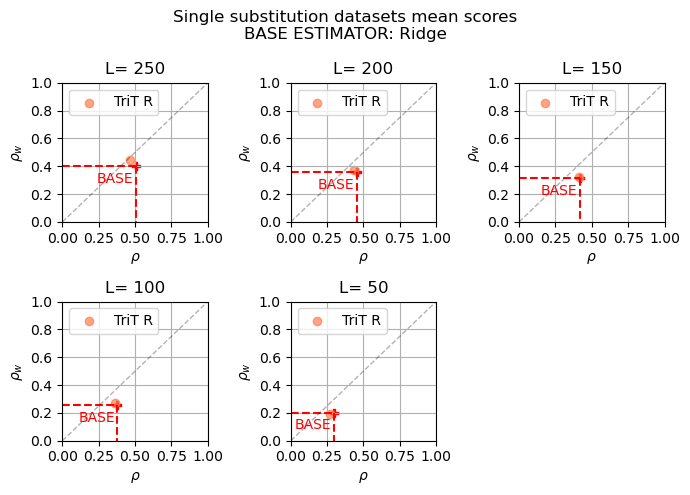

In [1095]:
printSupervisedComparison2DModel(estimator = 'r', metrics = ['spearman', 'wspearman'])

### Evolution plots

In [1096]:
import numpy as np
import statistics 

def set_box_color(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)


def printEvolution(estimators='C', metric='spearman'): 

    n_instances = ['250', '200', '150', '100', '50']
    
    offsets = [0.5, 1.0, 1.5]
    
    models = global_models_2
    titles = expand_estimators
    colors = model_colors
    datasets = datasets_1
    
    if estimators =='C': 
        models = {k:v for (k,v) in models.items() if k in ['rfc', 'abc', 'dtc', 'svc', 'gnb', 'knnc']}
    elif estimators == 'R': 
        models = {k:v for (k,v) in models.items() if k in ['rfr', 'abr', 'dtr', 'r', 'svr', 'knnr']}
    
    fig = plt.figure(figsize=(7.5, 5))
    plt.suptitle(f'Single-substitution datasets evolution ({metric_labels[metric]})')
    
    for case, base_estimator in enumerate(models.keys()): 
    
        base_data = []
        base_data_mean = []
        for n in n_instances:
            row = []
            for dataset in datasets: 
                scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'_'+n+'_instances.pk', 'rb'))
                row.append(np.mean([s[metric+'_'+base_estimator] for s in scores]))
            base_data.append(row)
            base_data_mean.append(statistics.median(row))

        semi_data = []
        semi_data_mean = []
        for model_name, model in models[base_estimator]: 
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                row = []
                for dataset in datasets: 
                    scores = pk.load(open('results/scores_comparison_'+model_name+'_'+dataset+'_'+n+'_instances.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+model] for s in scores]))
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            semi_data.append(model_data)
            semi_data_mean.append(model_data_mean)


        base_data_x = np.array(range(len(base_data)))*2
        semi_data_x = []
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            semi_data_x.append(np.array(range(len(semi_data[i])))*2+offsets[i])


        plt.subplot(2, 3, case+1)

        plt.plot(base_data_x, base_data_mean, '--', color='red')
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            plt.plot(semi_data_x[i], semi_data_mean[i], '--', color=colors[model_name])
        #plt.legend(fontsize=8)


        bp = plt.boxplot(base_data, positions=base_data_x, sym='.', widths=0.35, patch_artist=True)
        set_box_color(bp, 'red')
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            bp = plt.boxplot(semi_data[i], positions=semi_data_x[i], sym='.', widths=0.35, patch_artist=True)
            set_box_color(bp, colors[model_name])


        plt.xlabel('# labeled instances')
        plt.xticks(range(0, int(len(n_instances) * 2), 2), n_instances)
        plt.xlim(-1.5, len(n_instances)*2)
        plt.ylim(0, 0.8)

        plt.ylabel(metric_labels[metric])
        if estimators=='C':
            plt.title('Base C: '+titles[base_estimator])
        elif estimators=='R': 
            plt.title('Base R: '+titles[base_estimator])

        plt.tight_layout()
        plt.grid()
      
    #overall legend 
    methods = []
    for aux in models.values(): 
        for name, _ in aux: 
            methods.append(name)
    methods = set(methods)
    plt.scatter([],[], color='red', marker='s', label='BASE')
    for method in methods:
        label = method
        plt.scatter([],[], color=colors[method], marker='s', label=label)
        
    plt.legend(loc='lower center', bbox_to_anchor=(-0.9, -0.6), ncol=len(methods)+1)
    
    fig.savefig(f'figs/evolution_{estimators}_{metric}.png', bbox_inches='tight')


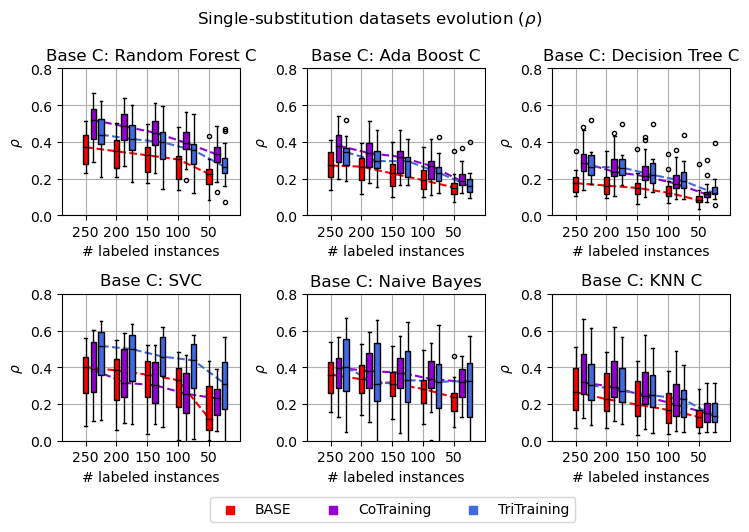

In [1097]:
printEvolution(estimators='C', metric='spearman')

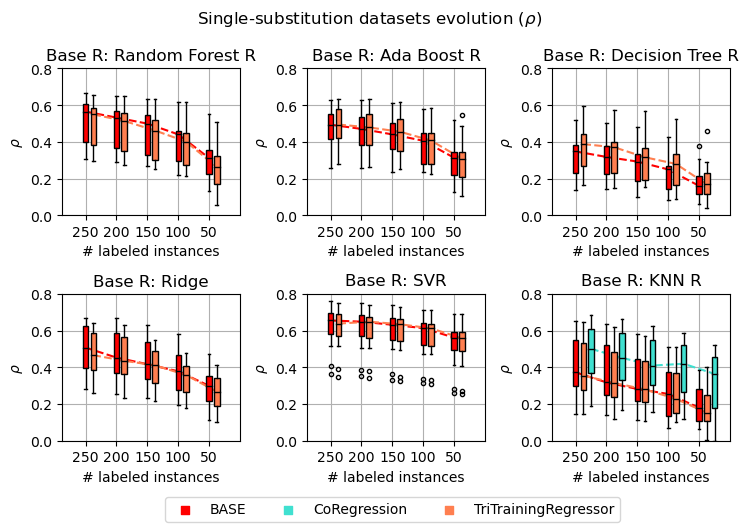

In [1098]:
printEvolution(estimators='R', metric='spearman')

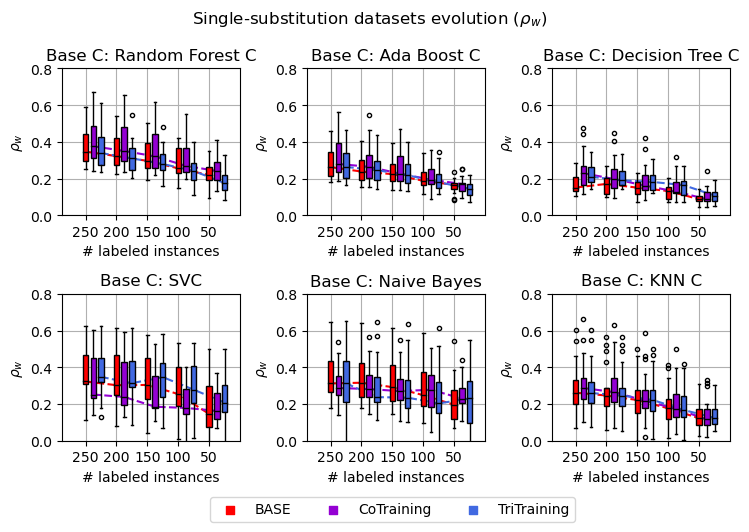

In [1099]:
printEvolution(estimators='C', metric='wspearman')

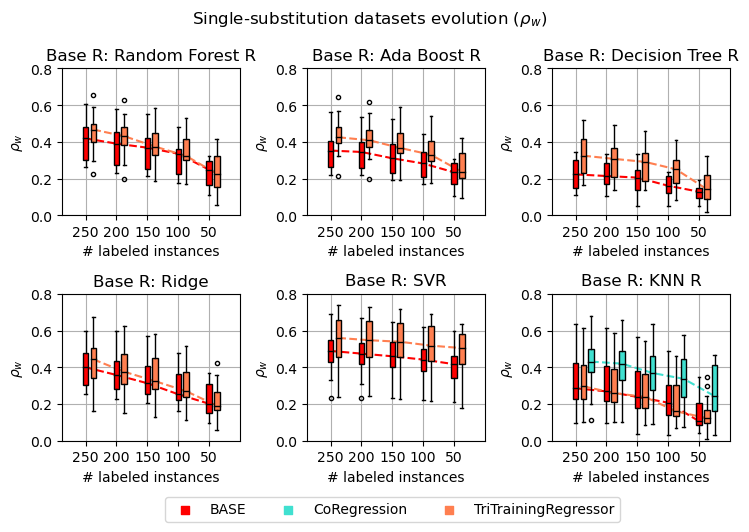

In [1100]:
printEvolution(estimators='R', metric='wspearman')

## 2.b. Double-substitutions and multiple-substitutions datasets 
- Training with random subsamples of double-substitutions (pabp_yeast_2) and multiple substitutions (avgfp) datasets. 
- Subsample size = 250, 200, 150, 100, 50
- 10 random repetitions of training and testing with the rest. 

In [1101]:
def set_box_color(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)

def printEvolutionDataset(estimators='C', metric='spearman', dataset='avgfp'): 

    n_instances = ['250', '200', '150', '100', '50']
    
    offsets = [0.5, 1.0, 1.5]
    
    models = global_models_2
    titles = expand_estimators
    colors = model_colors
    
    if estimators =='C': 
        models = {k:v for (k,v) in models.items() if k in ['rfc', 'abc', 'dtc', 'svc', 'gnb', 'knnc']}
    elif estimators == 'R': 
        models = {k:v for (k,v) in models.items() if k in ['rfr', 'abr', 'dtr', 'r', 'svr', 'knnr']}
    
    fig = plt.figure(figsize=(7.5, 5))
    if dataset =='avgfp': 
        plt.suptitle(f'Multiple-substitutions dataset evolution ({metric_labels[metric]})')
    elif dataset =='pabp_yeast_2': 
        plt.suptitle(f'Double-substitutions dataset evolution ({metric_labels[metric]})')
    
    for case, base_estimator in enumerate(models.keys()): 
    
        base_data = []
        base_data_mean = []
        for n in n_instances:
            scores = pk.load(open('results/scores_supervised_comparison_'+dataset+'_'+n+'_instances.pk', 'rb'))
            row = [s[metric+'_'+base_estimator] for s in scores]
            base_data.append(row)
            base_data_mean.append(statistics.median(row))

        semi_data = []
        semi_data_mean = []
        for model_name, model in models[base_estimator]: 
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                scores = pk.load(open('results/scores_comparison_'+model_name+'_'+dataset+'_'+n+'_instances.pk', 'rb'))
                row = [s[metric+'_'+model] for s in scores]
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
                
            semi_data.append(model_data)
            semi_data_mean.append(model_data_mean)


        base_data_x = np.array(range(len(base_data)))*2
        semi_data_x = []
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            semi_data_x.append(np.array(range(len(semi_data[i])))*2+offsets[i])


        plt.subplot(2, 3, case+1)

        plt.plot(base_data_x, base_data_mean, '--', color='red')
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            plt.plot(semi_data_x[i], semi_data_mean[i], '--', color=colors[model_name])
        #plt.legend(fontsize=8)


        bp = plt.boxplot(base_data, positions=base_data_x, sym='.', widths=0.35, patch_artist=True)
        set_box_color(bp, 'red')
        for i, (model_name, model) in enumerate(models[base_estimator]): 
            bp = plt.boxplot(semi_data[i], positions=semi_data_x[i], sym='.', widths=0.35, patch_artist=True)
            set_box_color(bp, colors[model_name])


        plt.xlabel('# labeled instances')
        plt.xticks(range(0, int(len(n_instances) * 2), 2), n_instances)
        plt.xlim(-1.5, len(n_instances)*2)
        plt.ylim(0, 0.8)

        plt.ylabel(metric_labels[metric])
        if estimators=='C':
            plt.title('Base C: '+titles[base_estimator])
        elif estimators=='R': 
            plt.title('Base R: '+titles[base_estimator])

        plt.tight_layout()
        plt.grid()
      
    #overall legend 
    methods = []
    for aux in models.values(): 
        for name, _ in aux: 
            methods.append(name)
    methods = set(methods)
    plt.scatter([],[], color='red', marker='s', label='BASE')
    for method in methods: 
        label = method
        plt.scatter([],[], color=colors[method], marker='s', label=label)
    plt.legend(loc='lower center', bbox_to_anchor=(-0.9, -0.6), ncol=len(methods)+1)
    
    fig.savefig(f'figs/evolution_{estimators}_{metric}_{dataset}.png', bbox_inches='tight')


#### avgfp (multiple)

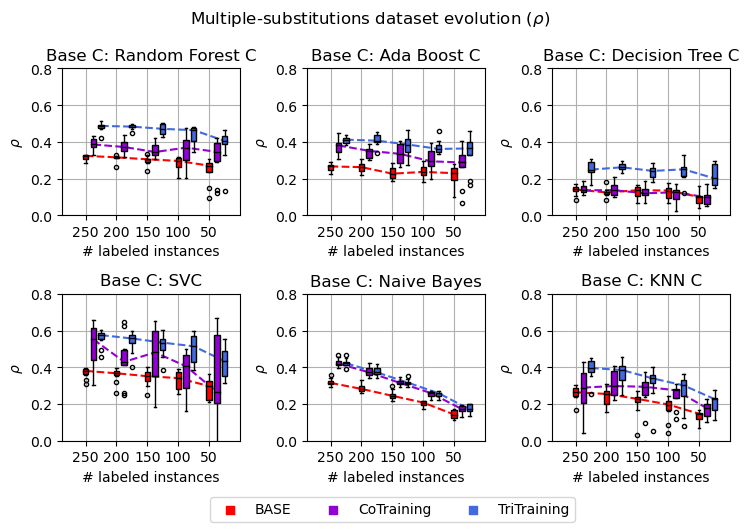

In [1102]:
printEvolutionDataset(estimators='C', metric='spearman', dataset='avgfp')

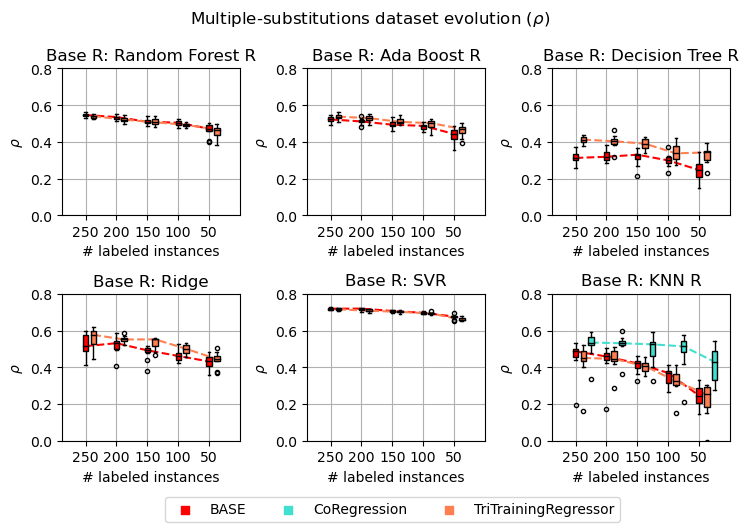

In [1103]:
printEvolutionDataset(estimators='R', metric='spearman', dataset='avgfp')

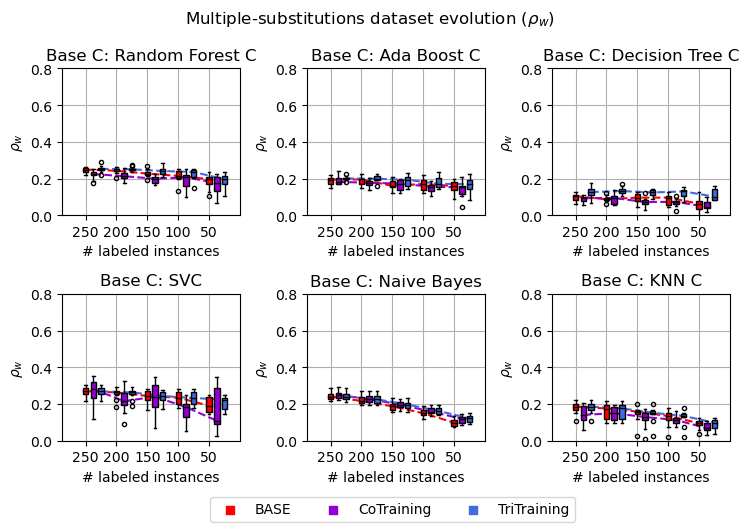

In [1104]:
printEvolutionDataset(estimators='C', metric='wspearman', dataset='avgfp')

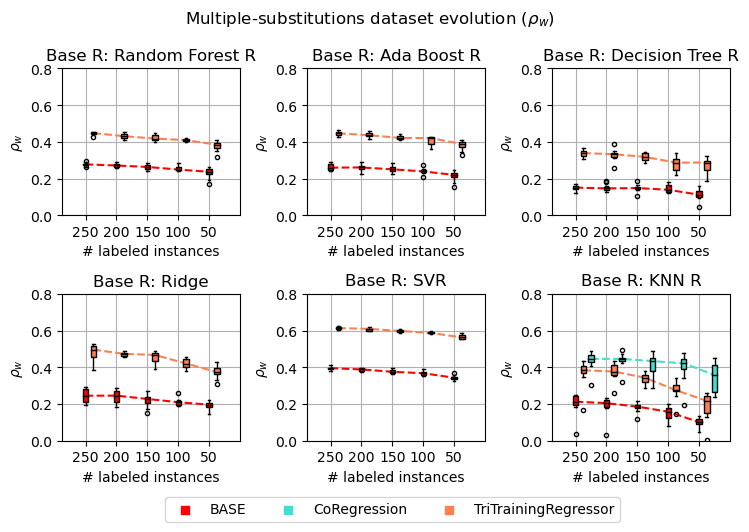

In [1105]:
printEvolutionDataset(estimators='R', metric='wspearman', dataset='avgfp')

#### pabp_yeast_2 (double)

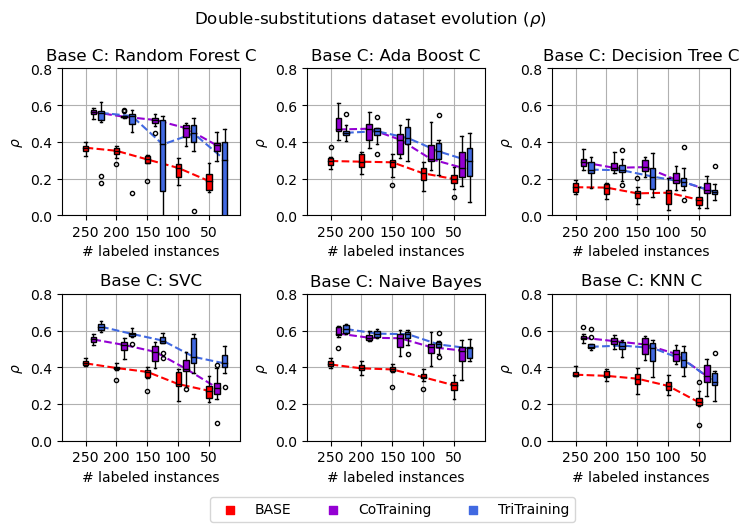

In [1106]:
printEvolutionDataset(estimators='C', metric='spearman', dataset='pabp_yeast_2')

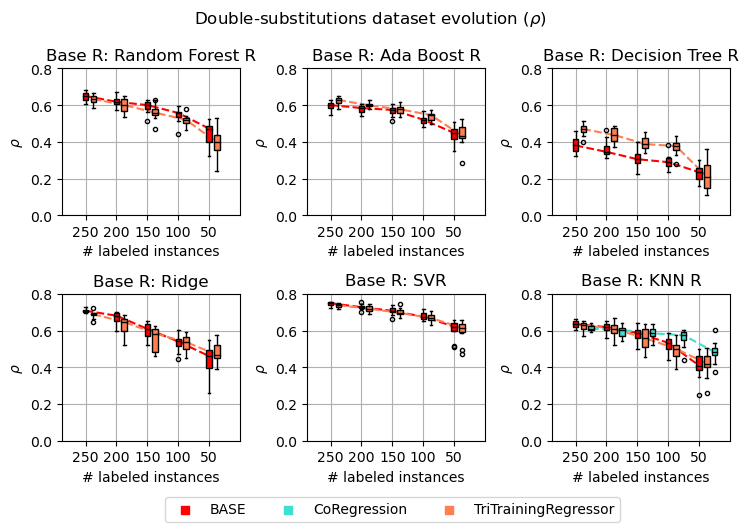

In [1107]:
printEvolutionDataset(estimators='R', metric='spearman', dataset='pabp_yeast_2')

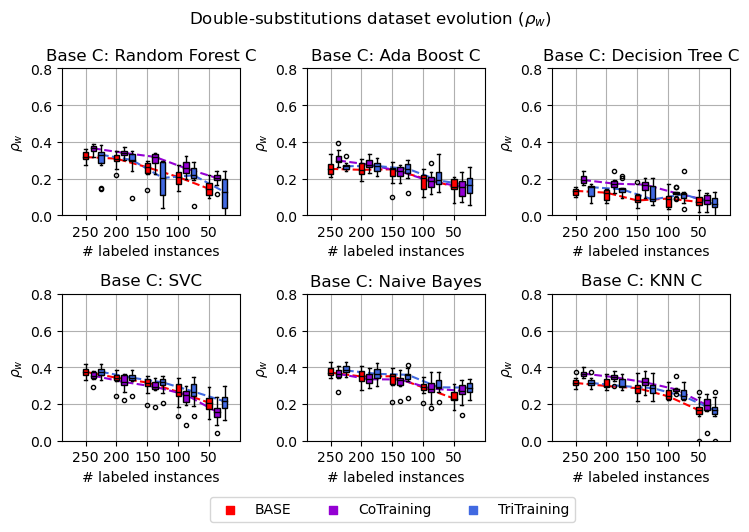

In [1108]:
printEvolutionDataset(estimators='C', metric='wspearman', dataset='pabp_yeast_2')

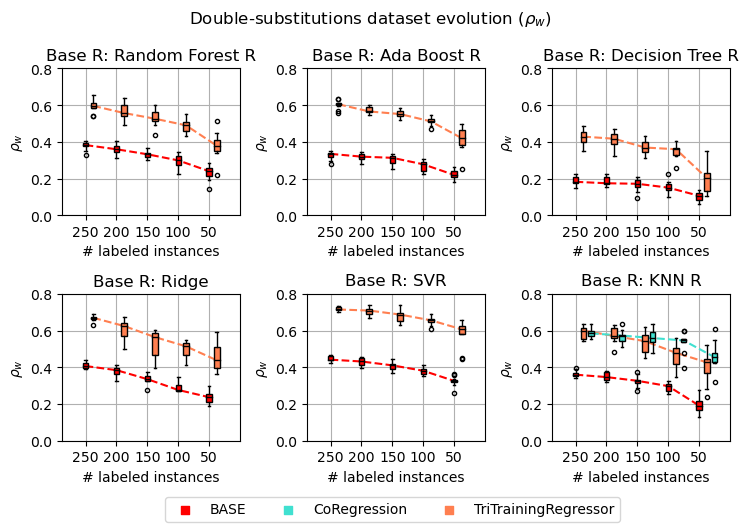

In [1109]:
printEvolutionDataset(estimators='R', metric='wspearman', dataset='pabp_yeast_2')

# 3. State-of-the-art comparison
## Single-substitutions

In [165]:
sota_models = {'MERGE': ('merge_svm', 'merge_r'), 
               'Unirep': ('unirep_rf', ),
               'eUnirep': ('eunirep_rf',)
              }

model_colors = {'merge_r': 'darkviolet',
                'merge_rf': 'yellow',
                'merge_knn': 'greenyellow', 
                'merge_ab': 'turquoise',
                'merge_dt': 'magenta',
                'merge_svm': 'royalblue', 
                'tritr_svm': 'turquoise',
                'unirep_rf': 'coral', 
                'unirep_ab': 'red',
                'unirep_dt': 'blue',
                'unirep_r': 'orange', 
                'unirep_svm': 'gray', 
                'unirep_knn': 'cyan', 
                'eunirep_rf': 'green',
                'eunirep_ab': 'red',
                'eunirep_dt': 'blue',
                'eunirep_r': 'orange', 
                'eunirep_svm': 'gray', 
                'eunirep_knn': 'cyan'
               }

abbreviations_sota = {
                        'merge_rf': 'MERGE\n[RF_R]', 
                        'merge_ab': 'MERGE\n[AB_R]', 
                        'merge_dt': 'MERGE\n[DT_R]', 
                        'merge_r': 'MERGE\n[RL_R]', 
                        'merge_svm': 'MERGE\n[SV_R]', 
                        'merge_knn': 'MERGE\n[KNN_R]', 
                        'tritr_svm': 'TriT_R\n[SV_R]', 
                        'unirep_rf': 'Unirep\n[RF_R]',
                        'unirep_ab': 'Unirep\n[AB_R]',
                        'unirep_dt': 'Unirep\n[DT_R]', 
                        'unirep_r': 'Unirep\n[RL_R]', 
                        'unirep_svm': 'Unirep\n[SV_R]',
                        'unirep_knn': 'Unirep\n[KNN_R]', 
                        'eunirep_rf': 'eUnirep\n[RF_R]',
                        'eunirep_ab': 'eUnirep\n[AB_R]',
                        'eunirep_dt': 'eUnirep\n[DT_R]', 
                        'eunirep_r': 'eUnirep\n[RL_R]', 
                        'eunirep_svm': 'eUnirep\n[SV_R]',
                        'eunirep_knn': 'eUnirep\n[KNN_R]', 
                    }

best_model = ('TriTrainingRegressor', 'tritr_svm')

In [166]:
import matplotlib.ticker as ticker

def printSupervisedComparisonSOTA(metrics = ['spearman', 'wspearman'], models=sota_models, 
                                  best_model=best_model, fig_name='singles_overall_sota_subplot'): 
    
    datasets = datasets_1
    colors = dataset_colors

    fig, ax1 = plt.subplots(2, figsize=(6, 5))
    extra_artists = []
    title = plt.suptitle('Single-substitution datasets average scores', y=0.95)
    extra_artists.append(title)
    
    for n_plot, metric in enumerate(metrics): 
        
        overall_data = []
        overall_labels = []
        
        if best_model != None: 
            #add best model
            row = []
            for dataset in datasets: 
                key, model = best_model
                scores = pk.load(open(f'results/scores_comparison_{key}_{dataset}.pk', 'rb'))
                row.append(np.mean([s[metric+'_'+model] for s in scores]))
            overall_labels.append(abbreviations_sota[model])
            overall_data.append(row)
        
        
        #add SOTA
        for key, values in models.items():
            for model in values: 
                row = []
                for dataset in datasets: 
                    scores = pk.load(open(f'results/scores_comparison_sota_{key}_{dataset}.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+model] for s in scores]))
                overall_labels.append(abbreviations_sota[model])
                overall_data.append(row)

        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))

        bp = ax1[n_plot].boxplot(overall_data, showfliers=False)
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 45)

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(-0.2, 1)
        ax1[n_plot].set_xlim(0.5, len(overall_labels)+0.5)

        ax1[n_plot].set_ylabel(metric_labels[metric])

        alpha_points = 0.4
        for i, (x, d) in enumerate(zip(xs, overall_data)): 
            for axis, point, c, dataset in zip(x, d, colors, datasets):
                if i==0: 
                    if len(dataset)>14: 
                        dataset = dataset[:12]+'.'
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=dataset)
                else: 
                    ax1[n_plot].scatter(axis, point, alpha=alpha_points, color=c, label=None)
        plt.setp(bp['medians'], color='black', linestyle='--')
        
        if n_plot == len(metrics)-1:
            
            lgd = plt.legend(loc='center left', bbox_to_anchor=(-0.05, -0.85), 
                             ncol=4, fontsize=9, labelspacing=0.3, columnspacing=0)
            extra_artists.append(lgd)
            
    fig.savefig(f'figs/{fig_name}.png', bbox_extra_artists=extra_artists, bbox_inches='tight')        
   


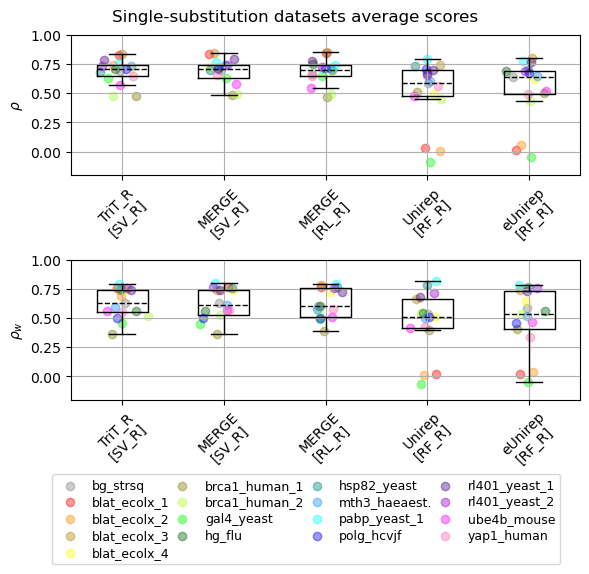

In [167]:
printSupervisedComparisonSOTA()

In [168]:
import numpy as np
import statistics 

def set_box_color_ev(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)

def printEvolutionSOTA(metrics = ['spearman', 'wspearman'], models=sota_models, best_model=best_model, 
                      fig_name='evolution_sota'): 
    
    
    n_instances = ['250', '200', '150', '100', '50']
    offsets = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.7]
    
    datasets = datasets_1 
    
    model_names = []
    if best_model != None: 
        model_names.append(best_model[1])
    for key, values in models.items(): 
        for model in values: 
            model_names.append(model)
    
    fig, ax1 = plt.subplots(2, figsize=(6, 5))
    extra_artists=[]
    title = plt.suptitle(f"Single-substitution datasets evolution", y=0.95) 
    extra_artists.append(title)
    
    for n_plot, metric in enumerate(metrics): 

        data = []
        data_mean = []
        
        if best_model != None: 
        #add best model
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                row = []
                for dataset in datasets: 
                    key, model = best_model
                    scores = pk.load(open(f'results/scores_comparison_{key}_{dataset}_{n}_instances.pk', 'rb'))
                    row.append(np.mean([s[metric+'_'+model] for s in scores]))
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            data.append(model_data)
            data_mean.append(model_data_mean)
        
        #add SOTA
        for key, values in models.items():
            for model in values: 
                model_data = []
                model_data_mean = []
                for n in n_instances: 
                    row = []
                    for dataset in datasets: 
                        scores = pk.load(open(f'results/scores_comparison_sota_{key}_{dataset}_{n}_instances.pk', 'rb'))
                        row.append(np.mean([s[metric+'_'+model] for s in scores]))
                    model_data.append(row)
                    model_data_mean.append(statistics.median(row))
                data.append(model_data)
                data_mean.append(model_data_mean)

        data_x = []
        for i, model in enumerate(model_names):  
            data_x.append(np.array(range(len(data[i])))*2+offsets[i])



        for i, model in enumerate(model_names):  
            ax1[n_plot].plot(data_x[i], data_mean[i], '--', color=model_colors[model])
            bp = ax1[n_plot].boxplot(data[i], positions=data_x[i], sym='.', widths=0.25, patch_artist=True)
            set_box_color_ev(bp, model_colors[model])

        ax1[n_plot].set_xlabel('# labeled instances')
        ax1[n_plot].set_xticks(range(0, int(len(n_instances)*2), 2), n_instances)
        ax1[n_plot].set_xlim(-1, len(n_instances)*2)
        ax1[n_plot].set_ylim(-0.2, 1)
        ax1[n_plot].set_ylabel(metric_labels[metric])
        plt.tight_layout()
        ax1[n_plot].grid()

    #overall legend
    for model in model_names: 
        ax1[n_plot].scatter([], [], color = model_colors[model],  marker='s', label=abbreviations_sota[model])

    lgd = plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.6), ncol=len(model_names)+1, columnspacing=0.8)
    extra_artists.append(lgd)

    fig.savefig(f'figs/{fig_name}.png', bbox_extra_artists=extra_artists, bbox_inches='tight')

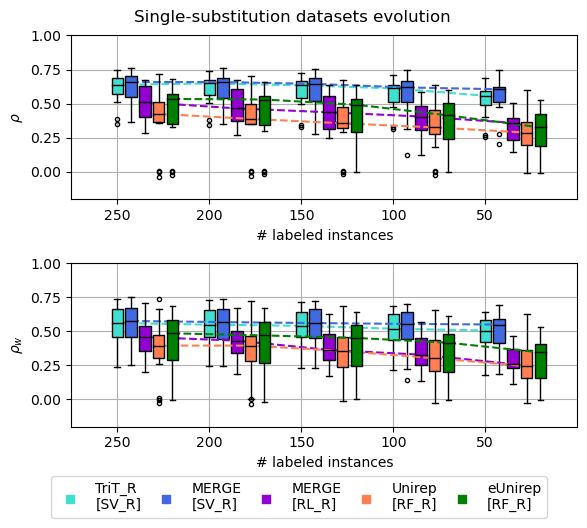

In [169]:
printEvolutionSOTA()

## Double and multiple-substitutions 

In [170]:
import matplotlib.ticker as ticker

def set_box_color(bp, color): 

    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['fliers'], color=color)
    plt.setp(bp['means'], color=color)
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['caps'], color=color)
    
    for patch in bp['boxes']: 
        patch.set_facecolor('white')

def printSupervisedComparisonSOTAMultiple(metrics = ['spearman', 'wspearman'], models=sota_models, 
                                          best_model=best_model, fig_name='multiples_sota_subplot'): 
    
    fig, ax1 = plt.subplots(2, figsize=(6, 5))
    extra_artists = []
    title = plt.suptitle(f'Double- and multiple-substitution datasets scores', y=0.95)
    extra_artists.append(title)
    
    for n_plot, metric in enumerate(metrics): 
        
        overall_data_1 = []
        overall_data_2 = []
        overall_labels = []
        
        if best_model != None: 
            #add best model
            key, model = best_model
            scores_1 = pk.load(open('results/scores_comparison_'+key+'_avgfp.pk', 'rb'))
            scores_2 = pk.load(open('results/scores_comparison_'+key+'_pabp_yeast_2.pk', 'rb'))
            overall_data_1.append([s[metric+'_'+model] for s in scores_1])
            overall_data_2.append([s[metric+'_'+model] for s in scores_2])
            overall_labels.append(abbreviations_sota[model])
        
        #add SOTA
        for key, values in models.items():
            for model in values:  
                scores_1 = pk.load(open('results/scores_comparison_sota_'+key+'_avgfp.pk', 'rb'))
                scores_2 = pk.load(open('results/scores_comparison_sota_'+key+'_pabp_yeast_2.pk', 'rb'))
                overall_data_1.append([s[metric+'_'+model] for s in scores_1])
                overall_data_2.append([s[metric+'_'+model] for s in scores_2])
                overall_labels.append(abbreviations_sota[model])

        #BIG PLOT 
        xs=[]
        for i, d in enumerate(overall_data_1): 
            xs.append(np.random.normal(i+1, 0.09, len(d)))

        bp_1 = ax1[n_plot].boxplot(overall_data_1, sym='.', patch_artist=True)
        bp_2 = ax1[n_plot].boxplot(overall_data_2, sym='.', patch_artist=True)
        
        ax1[n_plot].set_xticks(range(1,len(overall_labels)+1), overall_labels, rotation = 45)

        plt.tight_layout()
        ax1[n_plot].grid()
        ax1[n_plot].set_ylim(-0.2, 1)

        ax1[n_plot].set_ylabel(metric_labels[metric])
        
        set_box_color(bp_1, 'blue')
        set_box_color(bp_2, 'green')
        
        ax1[n_plot].plot([], [], marker='s', color='blue', linestyle='', label='multiple')
        ax1[n_plot].plot([], [], marker='s', color='green', linestyle='', label='double')
        ax1[n_plot].legend(loc='lower right')
    
    fig.savefig(f'figs/{fig_name}.png', bbox_extra_artists=extra_artists, bbox_inches='tight')

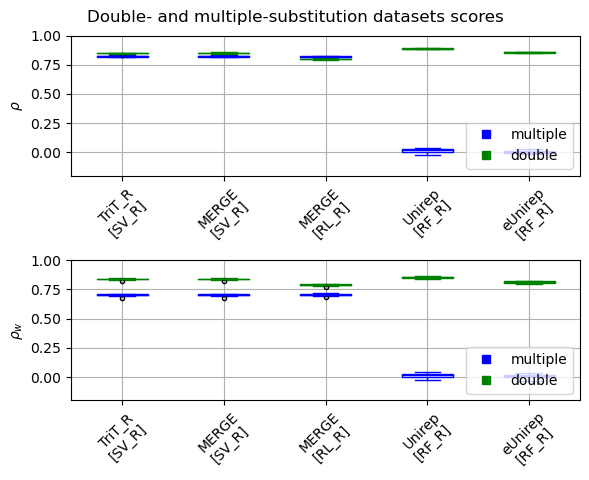

In [171]:
printSupervisedComparisonSOTAMultiple()

In [172]:
import numpy as np
import statistics 

def set_box_color_ev(bp, color): 

    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black')
    plt.setp(bp['fliers'], color='black')
    plt.setp(bp['means'], color='black')
    plt.setp(bp['medians'], color='black')
    plt.setp(bp['caps'], color='black')
    
    for patch in bp['boxes']: 
        patch.set_facecolor(color)

def printEvolutionSOTADataset(metrics = ['spearman', 'wspearman'], dataset = 'avgfp', models=sota_models, 
                              best_model=best_model, fig_name='evolution_avgfp_sota'): 
    
    
    n_instances = ['250', '200', '150', '100', '50']
    offsets = [0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.7]
    
    datasets = datasets_1 
    
    model_names = []
    if best_model != None: 
        model_names.append(best_model[1])
    for key, values in models.items(): 
        for model in values: 
            model_names.append(model)
    
    fig, ax1 = plt.subplots(2, figsize=(4, 5))
    extra_artists = []
    if dataset == 'avgfp': 
        title = plt.suptitle(f"Multiple-substitution datasets evolution", y=0.95)
    elif dataset == 'pabp_yeast_2': 
        title = plt.suptitle(f"Double-substitution datasets evolution", y=0.95)
    extra_artists.append(title)
        
    
    for n_plot, metric in enumerate(metrics): 
            
        data = []
        data_mean = []
        
        if best_model != None: 
            #add best model
            model_data = []
            model_data_mean = []
            for n in n_instances: 
                key, model = best_model
                scores = pk.load(open(f'results/scores_comparison_{key}_{dataset}_{n}_instances.pk', 'rb'))
                row = [s[metric+'_'+model] for s in scores]
                model_data.append(row)
                model_data_mean.append(statistics.median(row))
            
            data.append(model_data)
            data_mean.append(model_data_mean)
        
        #add SOTA
        for key, values in models.items():
            for model in values: 
                model_data = []
                model_data_mean = []
                for n in n_instances: 
                    scores = pk.load(open(f'results/scores_comparison_sota_{key}_{dataset}_{n}_instances.pk', 'rb'))
                    row = [s[metric+'_'+model] for s in scores]
                    model_data.append(row)
                    model_data_mean.append(statistics.median(row))
                data.append(model_data)
                data_mean.append(model_data_mean)

        data_x = []
        for i, model in enumerate(model_names):  
            data_x.append(np.array(range(len(data[i])))*2+offsets[i])



        for i, model in enumerate(model_names):  
            ax1[n_plot].plot(data_x[i], data_mean[i], '--', color=model_colors[model])
            bp = ax1[n_plot].boxplot(data[i], positions=data_x[i], sym='.', widths=0.25, patch_artist=True)
            set_box_color_ev(bp, model_colors[model])

        ax1[n_plot].set_xlabel('# labeled instances')
        ax1[n_plot].set_xticks(range(0, int(len(n_instances)*2), 2), n_instances)
        ax1[n_plot].set_xlim(-1, len(n_instances)*2)
        ax1[n_plot].set_ylim(-0.2, 1)
        ax1[n_plot].set_ylabel(metric_labels[metric])
        plt.tight_layout()
        ax1[n_plot].grid()

    #overall legend
    for model in model_names: 
        ax1[n_plot].scatter([], [], color = model_colors[model],  marker='s', label=abbreviations_sota[model])
    
    lgd = plt.legend(loc='lower center', bbox_to_anchor=(0.45, -0.8), ncol=3, columnspacing=0.8)
    extra_artists.append(lgd)

    fig.savefig(f'figs/{fig_name}.png',bbox_extra_artists=extra_artists, bbox_inches='tight')

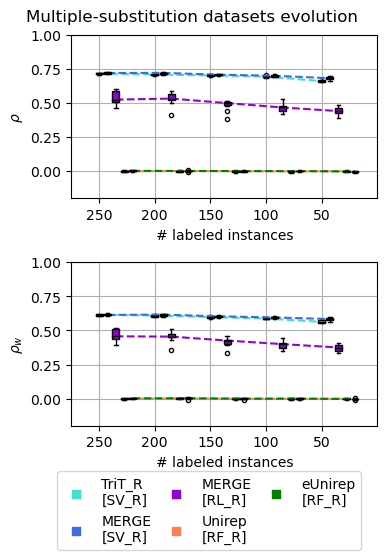

In [173]:
printEvolutionSOTADataset(dataset = 'avgfp', fig_name='evolution_avgfp_sota')

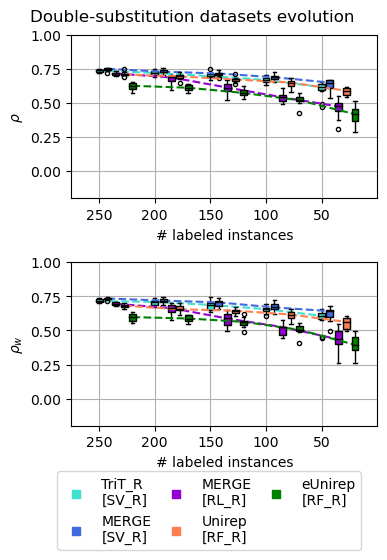

In [174]:
printEvolutionSOTADataset(dataset = 'pabp_yeast_2', fig_name='evolution_pabp_yeast_2_sota')

# MERGE

In [145]:
merge = {'MERGE': ('merge_r', 'merge_rf', 'merge_ab', 'merge_dt', 'merge_svm', 'merge_knn')}

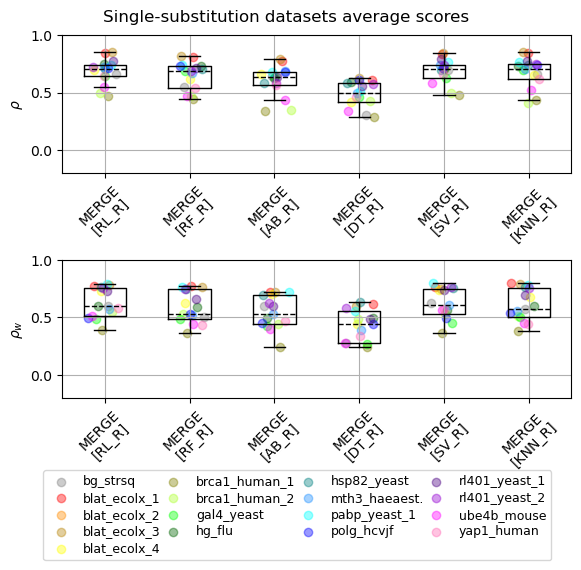

In [146]:
printSupervisedComparisonSOTA(models=merge, best_model=None, fig_name='singles_merge')

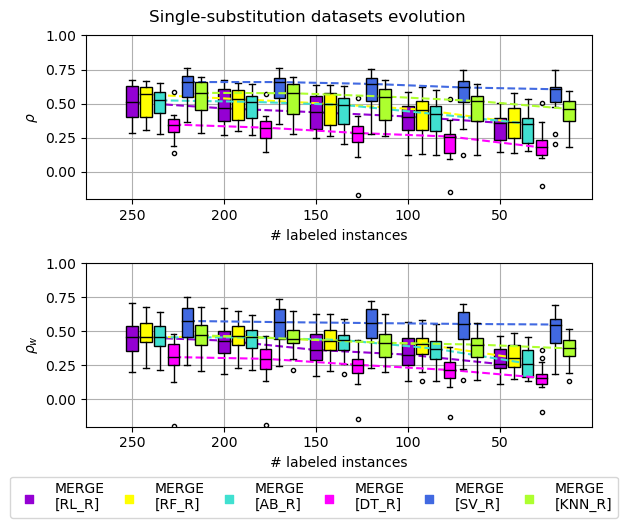

In [147]:
printEvolutionSOTA(models=merge, best_model=None, fig_name='evolution_merge')

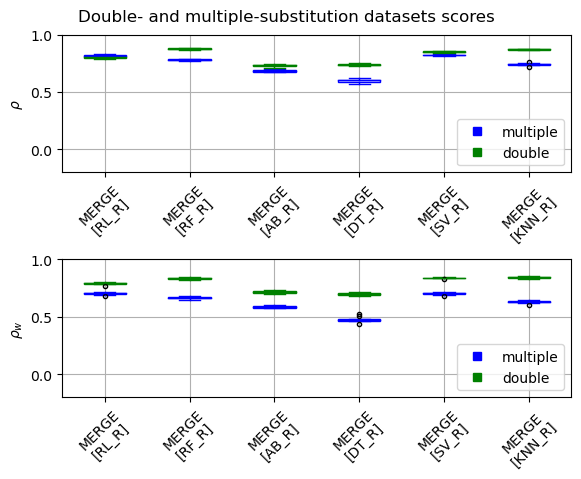

In [148]:
printSupervisedComparisonSOTAMultiple(models=merge, best_model=None, fig_name='multiples_merge')

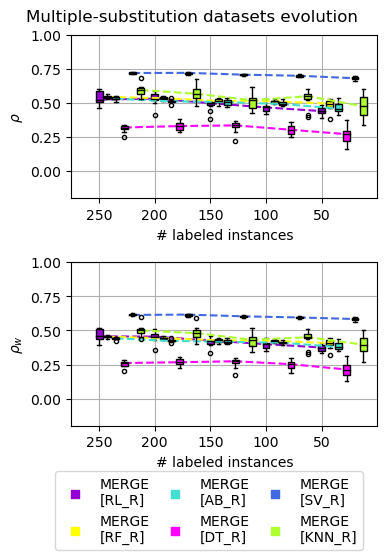

In [149]:
printEvolutionSOTADataset(dataset = 'avgfp', models=merge, best_model=None, 
                          fig_name='evolution_merge_avgfp')

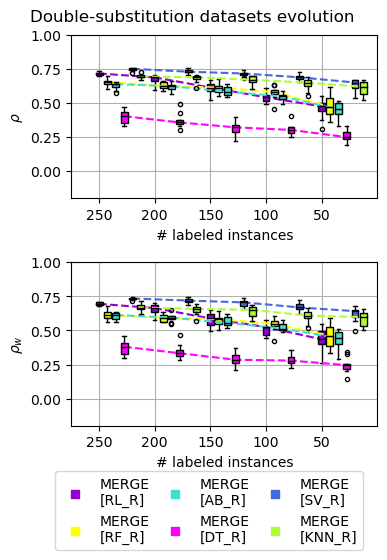

In [150]:
printEvolutionSOTADataset(dataset = 'pabp_yeast_2', models=merge, best_model=None, 
                          fig_name='evolution_merge_pabp_yeast_2')

# Unirep

In [151]:
unirep = {'Unirep': ('unirep_rf', 'unirep_ab', 'unirep_dt', 'unirep_r', 'unirep_svm', 'unirep_knn')}

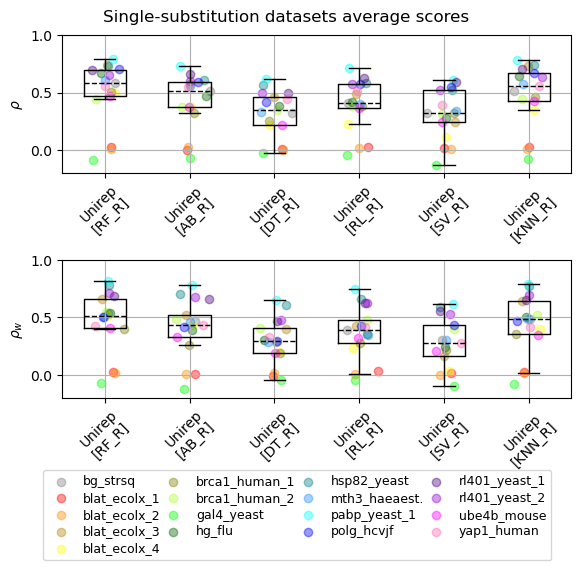

In [152]:
printSupervisedComparisonSOTA(models=unirep, best_model=None, fig_name='singles_unirep')

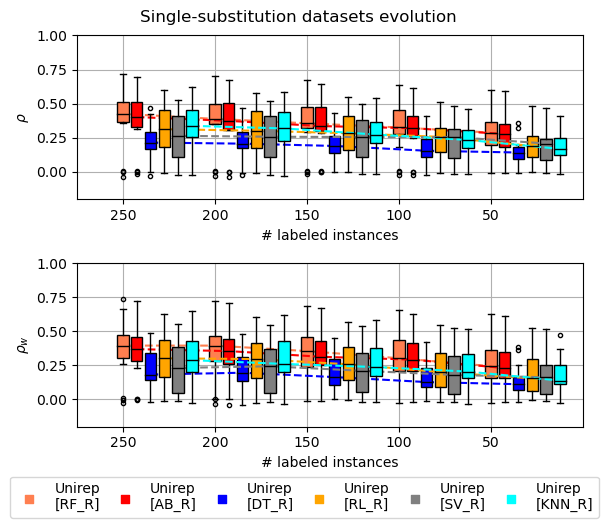

In [153]:
printEvolutionSOTA(models=unirep, best_model=None, fig_name='evolution_unirep')

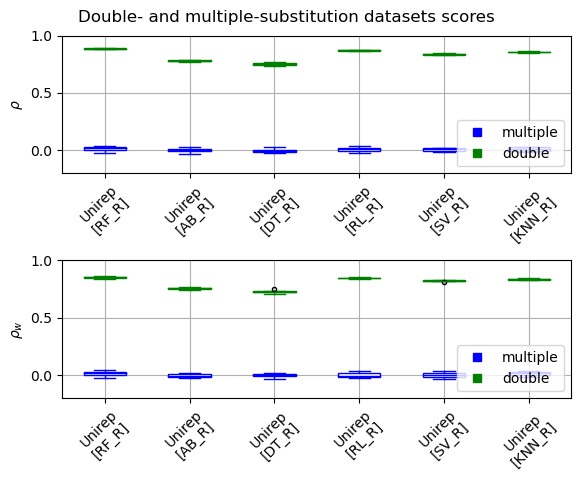

In [154]:
printSupervisedComparisonSOTAMultiple(models=unirep, best_model=None, fig_name='multiples_unirep')

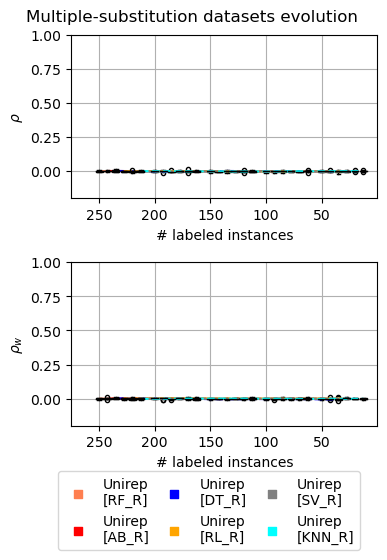

In [155]:
printEvolutionSOTADataset(dataset = 'avgfp', models=unirep, best_model=None,
                          fig_name='evolution_unirep_avgfp')

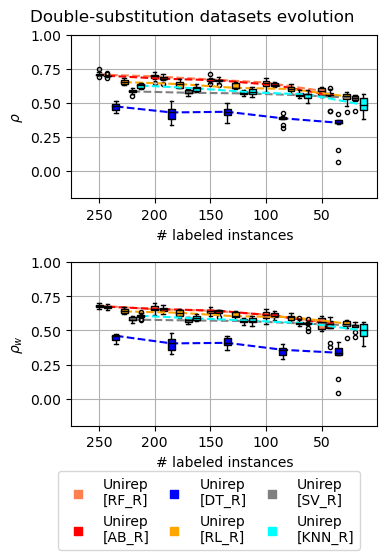

In [156]:
printEvolutionSOTADataset(dataset = 'pabp_yeast_2', models=unirep, best_model=None, 
                          fig_name='evolution_unirep_pabp_yeast_2')

# eUnirep

In [157]:
eunirep = {'eUnirep': ('eunirep_rf', 'eunirep_ab', 'eunirep_dt', 'eunirep_r', 'eunirep_svm', 'eunirep_knn')}

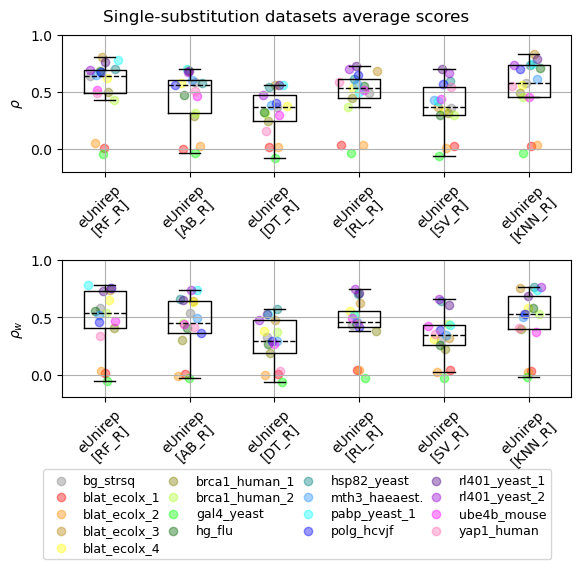

In [158]:
printSupervisedComparisonSOTA(models=eunirep, best_model=None, fig_name='singles_eunirep')

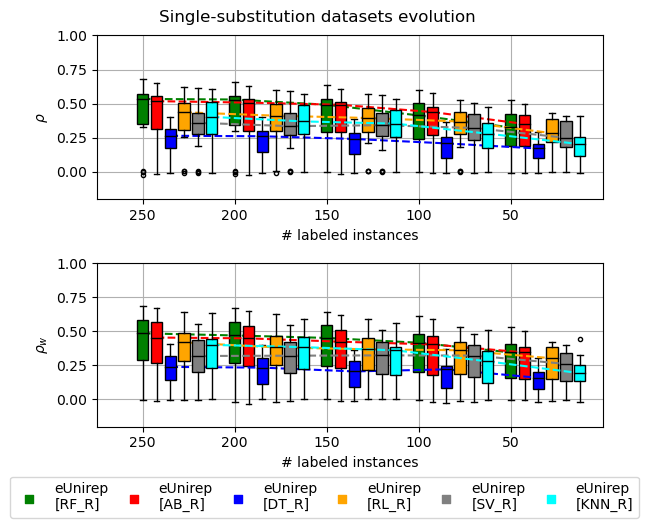

In [159]:
printEvolutionSOTA(models=eunirep, best_model=None, fig_name='evolution_eunirep')

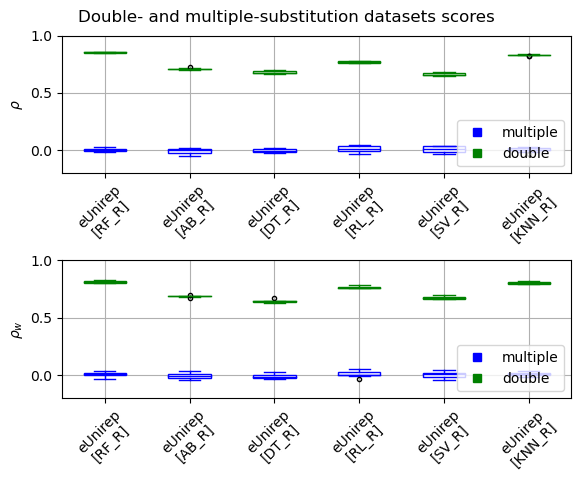

In [160]:
printSupervisedComparisonSOTAMultiple(models=eunirep, best_model=None, fig_name='multiples_eunirep')

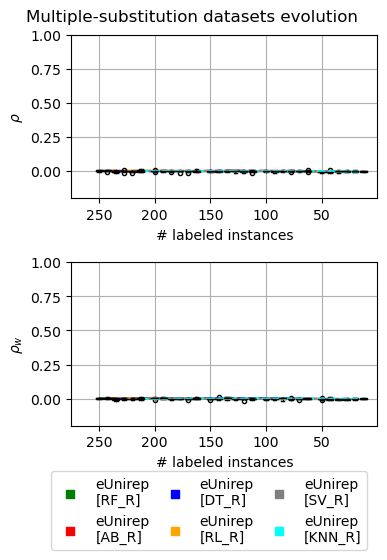

In [161]:
printEvolutionSOTADataset(dataset = 'avgfp', models=eunirep, best_model=None,
                          fig_name='evolution_eunirep_avgfp')

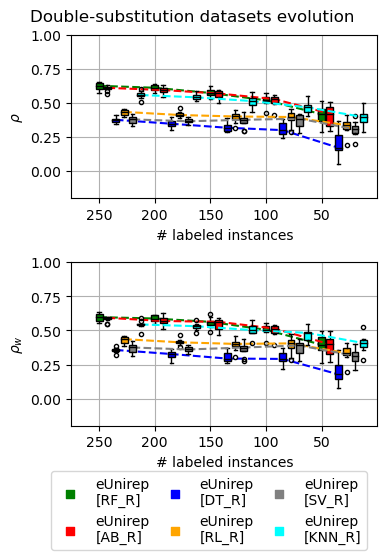

In [162]:
printEvolutionSOTADataset(dataset = 'pabp_yeast_2', models=eunirep, best_model=None, 
                          fig_name='evolution_eunirep_pabp_yeast_2')

# 4. Generalization

In [99]:
methods = [('MERGE', 'merge_svm'), 
           ('TriTrainingRegressor', 'tritr_svm'), 
           ('Unirep', 'unirep_rf'), 
           ('eUnirep', 'eunirep_rf')
          ]
metric = 'spearman'

for name, method in methods: 
    print(name, method)
    scores = pk.load(open('results/scores_generalization_'+name+'_avgfp.pk', 'rb'))
    for n in range(2, 15): 
        print(n, scores[metric+'_'+method+'_subs_'+str(n)])
    print(n, scores[metric+'_'+method+'_subs_MUL'])

MERGE merge_svm
2 0.5605671929839481
3 0.6878321884538355
4 0.715704322021708
5 0.5452448476585081
6 0.2930612993531017
7 0.1697234118458166
8 0.061233261992787225
9 -0.07758450767914328
10 0.11807833301176926
11 0.023150762281197064
12 -0.2571428571428572
13 0.09999999999999999
14 -1.0
14 0.7543064618785319
TriTrainingRegressor tritr_svm
2 0.5494889819132551
3 0.669571189936132
4 0.7101958310748326
5 0.5421416025156568
6 0.2883091004786374
7 0.1601840580835651
8 0.07990717331616562
9 -0.0598941484843074
10 0.09515081355714194
11 -0.05477131564088086
12 -0.3714285714285715
13 0.09999999999999999
14 -1.0
14 0.7522620075486811
Unirep unirep_rf
2 0.4511173295159533
3 0.5206445303321636
4 0.4957102872571148
5 0.3760025530890758
6 0.21245743233745215
7 0.05936346416374437
8 0.020243629747786197
9 -0.05973027729015792
10 0.11958968422406588
11 0.02766798418972332
12 -0.6
13 0.39999999999999997
14 0.5
14 0.651436951357075
eUnirep eunirep_rf
2 0.030991934482862932
3 0.04227278300379059
4 -0.01

In [104]:
methods = [
    #('MERGE', 'merge_svm'), 
           #('TriTrainingRegressor', 'tritr_svm'), 
           #('Unirep', 'unirep_rf'), 
           ('eUnirep', 'eunirep_rf')
          ]
metric = 'spearman'

for name, method in methods: 
    print(name, method)
    scores = pk.load(open('results/scores_adding_substitutions_'+name+'_avgfp.pk', 'rb'))
    print(scores)
    for n in range(2, 15): 
        print(n, scores[metric+'_'+method+'_subs_'+str(n)])

eUnirep eunirep_rf
{}


KeyError: 'spearman_eunirep_rf_subs_2'